# IMPORTS

In [3]:
%run ipynb_setup.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
import os
from pathlib import Path

In [10]:
df=pd.read_csv(Path(os.getcwd()) / 'Sales Of Summer Cloths.csv')

# ASSIGNMENT DETAILS

In [3]:
'''
Data Scientist Assignement

Sample dataset (https://drive.google.com/file/d/10CBAzbLTvEsabM-
TrHAcp1GsQynMGsZJ/view?usp=sharing) shows sales of a particular online clothing store.

In order to increase their sales, store would like to integrate a recommendation system into
it's search functionality. That means that search functionality should demonstrate a certain
logic and not just return items based on keyword match against name or description of
store’s catalogue.

Suggestions include:
• Consider rating and number of sold items, when looking at item categories.
Submission can be in form of a Python Jupyter notebook, to showcase graphs. That said it
must contain a search function that takes a query as input, returning a list of catalogue items.

Evaluation criteria includes:
• Logic and decisions on how search function was constructed.
• Clarity of explanations, so that evaluator can understand mentioned logic.
'''
None

In [4]:
'''
wish to increase sales
integrate recommendation system into search functionality
should NOT just return based on keyword (it CAN have something like it matching name or description)

SUGGESTIONS
- when looking at item categories
- similar ratings
- similar numbers sold

DO
- notebook to show graphs
- make search function that takes
        INPUT  = query
        OUTPUT = list of catalogue items
'''
None

# UNDERSTAND DATA 

In [121]:
df.head(1).transpose()

0
title                         2020 Summer Vintage Flamingo Print  Pajamas Se...
title_orig                    2020 Summer Vintage Flamingo Print  Pajamas Se...
price                                                                      16.0
retail_price                                                                 14
currency_buyer                                                              EUR
units_sold                                                                  100
uses_ad_boosts                                                                0
rating                                                                     3.76
rating_count                                                                 54
rating_five_count                                                          26.0
rating_four_count                                                           8.0
rating_three_count                                                         10.0
rating_two_count                                                            1.0
rating_one_count                                                            9.0
badges_count                                                                  0
badge_local_product                                                           0
badge_product_quality                                                         0
badge_fast_shipping                                                           0
tags                          Summer,Fashion,womenunderwearsuit,printedpajam...
product_color                                                             white
product_variation_size_id                                                     M
product_variation_inventory                                                  50
shipping_option_name                                         Livraison standard
shipping_option_price                                                         4
shipping_is_express                                                           0
countries_shipped_to                                                         34
inventory_total                                                              50
has_urgency_banner                                                          1.0
urgency_text                                                 Quantité limitée !
origin_country                                                               CN
merchant_title                                                         zgrdejia
merchant_name                                                          zgrdejia
merchant_info_subtitle                                              (568 notes)
merchant_rating_count                                                       568
merchant_rating                                                        4.128521
merchant_id                                            595097d6a26f6e070cb878d1
merchant_has_profile_picture                                                  0
merchant_profile_picture                                                    NaN
product_url                     https://www.wish.com/c/5e9ae51d43d6a96e303acdb0
product_picture               https://contestimg.wish.com/api/webimage/5e9ae...
product_id                                             5e9ae51d43d6a96e303acdb0
theme                                                                    summer
crawl_month                                                             2020-08

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

### functions to inspect each column by data type

In [148]:
def inspect_object(
    col : str, # column name
    ) -> None :
    uniques=df[col].unique()
    print(f'number of uniques = {len(uniques)}')
    print()
    print(uniques)
        
def inspect_numeric(
    col : str, # column name
    ) -> None :
    fig,ax=plt.subplots(3,2,figsize=(20,20))

    ###################################
    # raw
    ###################################
    # dat
    raw=df[col]
    raw.plot(title=f'[raw] {col}',ax=ax[0,0])

    # hist
    raw.hist(ax=ax[1,0])
    ax[0,1].set_title('[raw] hist')

    # qqplot
    sm.qqplot(raw-raw.mean(), line ='45',ax=ax[2,0])

    ###################################
    # logged
    ###################################
    # logged
    logged=df[col].copy()
    logged[logged<=0]=np.nan
    logged=np.log(logged)
    logged.plot(title=f'[logged] {col}',ax=ax[0,1])

    # hist
    logged.hist(ax=ax[1,1])
    ax[0,1].set_title('[logged] hist')

    # qqplot
    sm.qqplot(logged-logged.mean(), line ='45',ax=ax[2,1])

    ###################################
    # others
    ###################################
    plt.show()
    display(df[col].value_counts().head(10))

def understand_col(
    col : str, # column name
    ) -> None :
    print('-'*100)
    print(f'col = {col}')
    print('-'*100)
    
    if df[col].dtype in ['object']:
        inspect_object(col)
    elif df[col].dtype in ['float64','int64']:
        inspect_numeric(col)
    else:
        print(I_AM_AN_ERROR)

    print()

### look at each column

----------------------------------------------------------------------------------------------------
col = title
----------------------------------------------------------------------------------------------------
number of uniques = 1201

['2020 Summer Vintage Flamingo Print  Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets'
 'SSHOUSE Summer Casual Sleeveless Soirée Party Soirée sans manches Vêtements de plage sexy Mini robe femme wshC1612242400387A21'
 '2020 Nouvelle Arrivée Femmes Printemps et Été Plage Porter Longue Mince Cardigan Ouvert Avant Kimono Vert Feuille Imprimé En Mousseline de Soie Cardigan S-5XL'
 ...
 'Nouvelle Mode Femmes Bohême Pissenlit Imprimer Tee Shirt Lady Fille T-shirt À Manches Courtes Boho Graphique Tee Casual Yoga Top Plus La Taille'
 'Nouveautés Hommes Siwmwear Beach-Shorts Hommes Summer Short de bain court à séchage rapide Beach-Wear Sports'
 'Pantalon de yoga pour femmes à la mode Slim Fit Fitness Running 

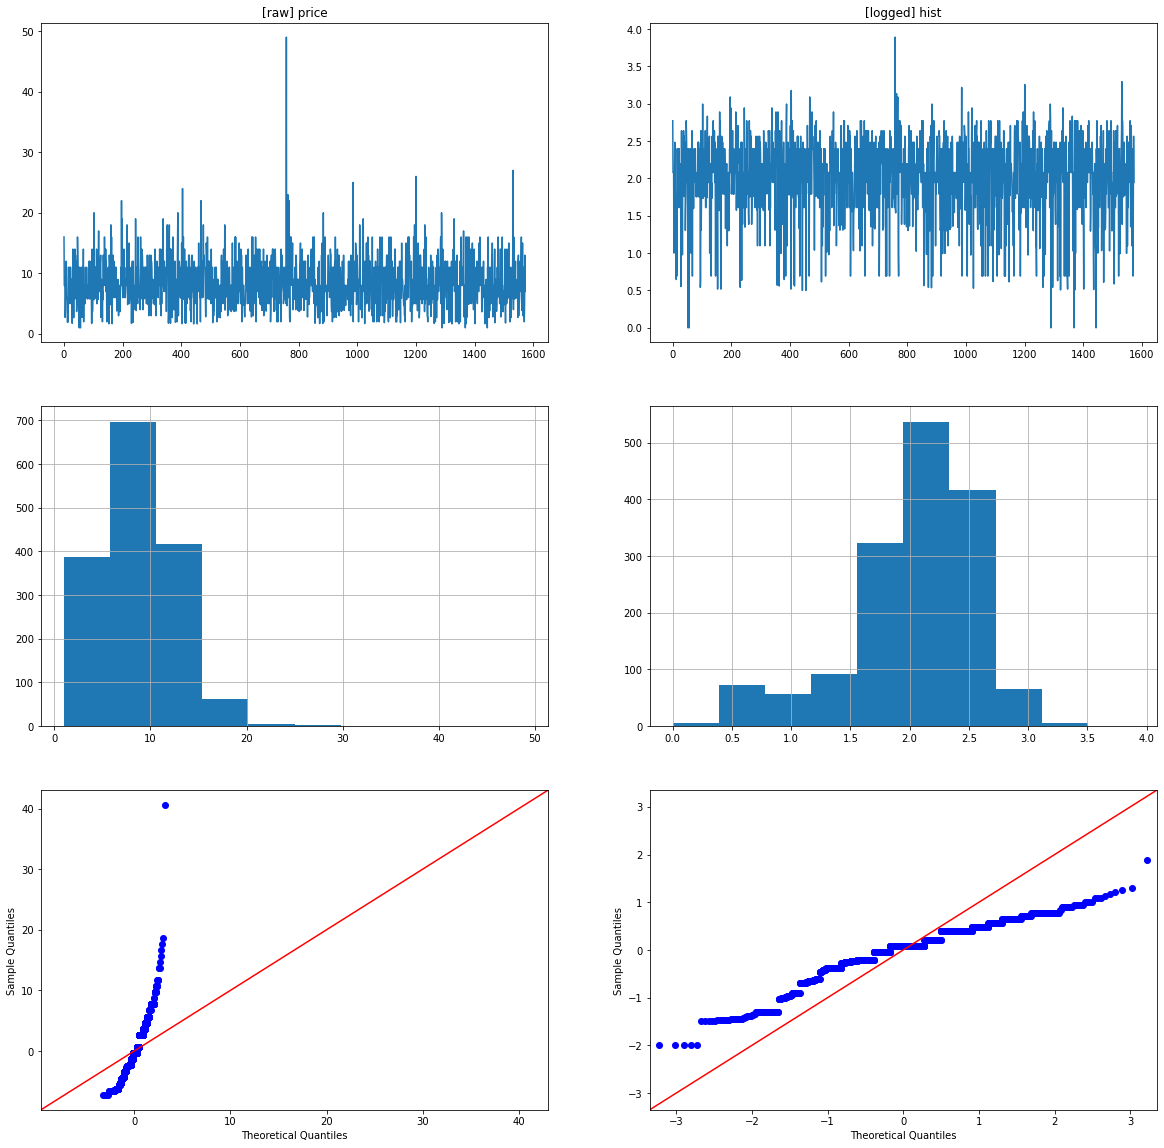

8.0     282
11.0    202
7.0     129
9.0     126
6.0     120
12.0     81
5.0      80
14.0     57
13.0     54
16.0     42
Name: price, dtype: int64


----------------------------------------------------------------------------------------------------
col = retail_price
----------------------------------------------------------------------------------------------------


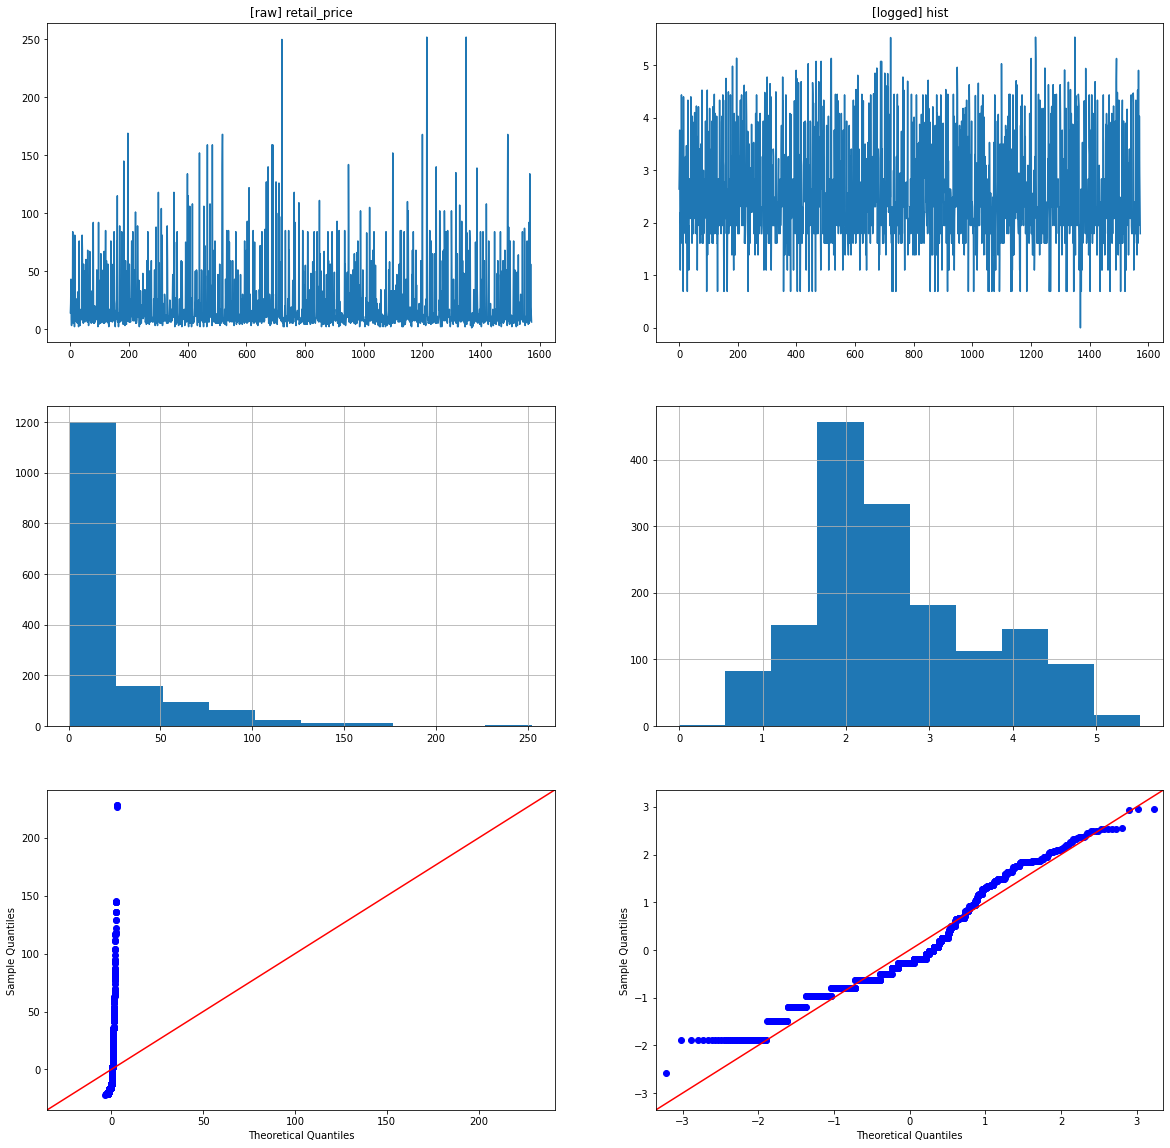

7     177
6     136
10    128
5     102
11     99
8      90
9      54
4      50
17     47
2      45
Name: retail_price, dtype: int64


----------------------------------------------------------------------------------------------------
col = currency_buyer
----------------------------------------------------------------------------------------------------
number of uniques = 1

['EUR']

----------------------------------------------------------------------------------------------------
col = units_sold
----------------------------------------------------------------------------------------------------


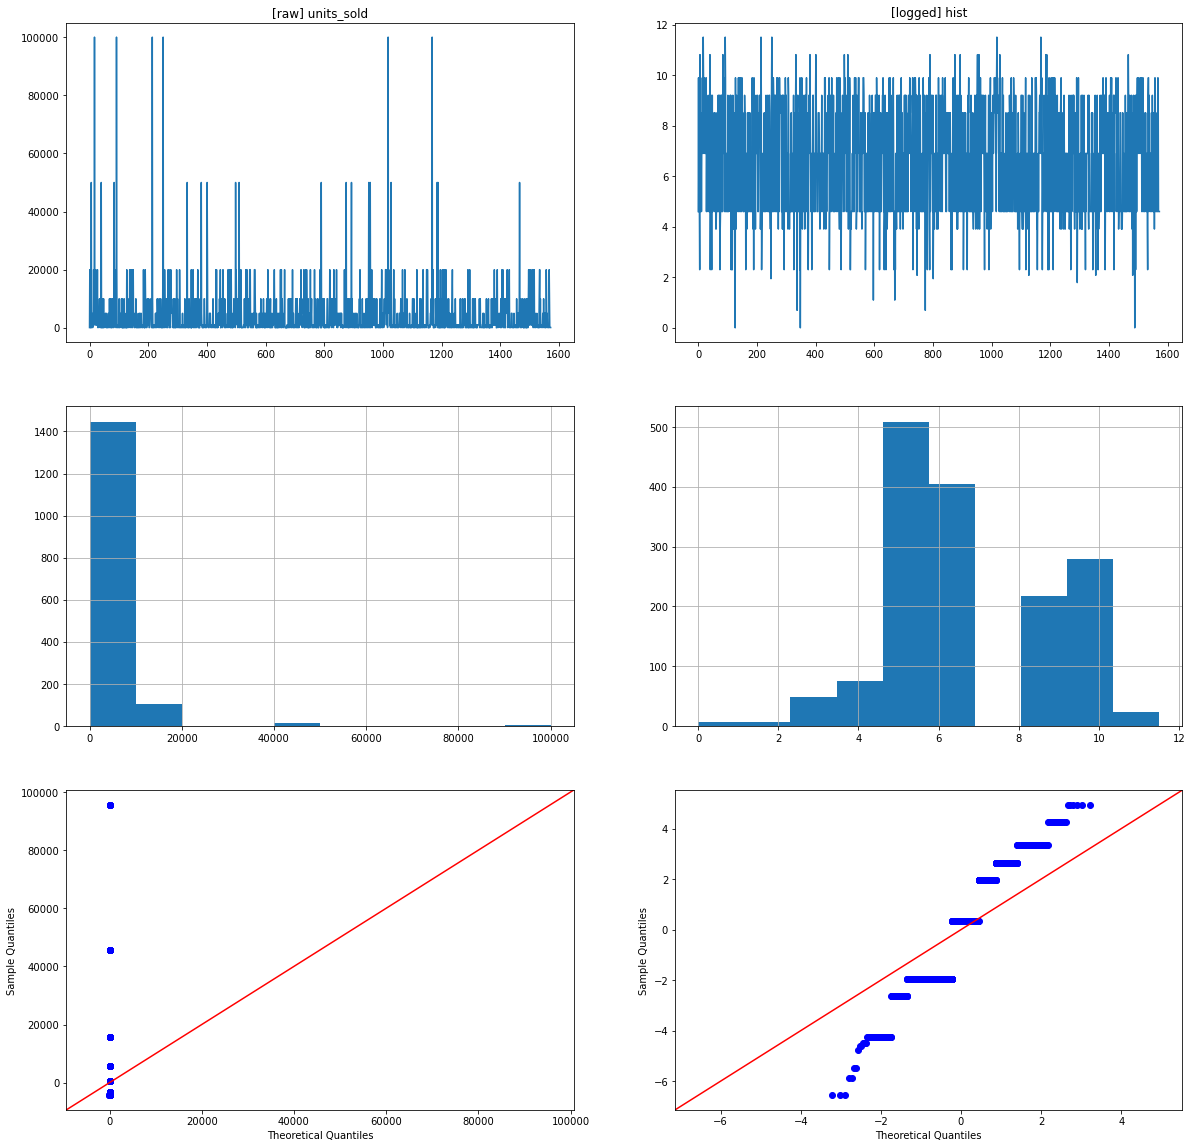

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
Name: units_sold, dtype: int64


----------------------------------------------------------------------------------------------------
col = uses_ad_boosts
----------------------------------------------------------------------------------------------------


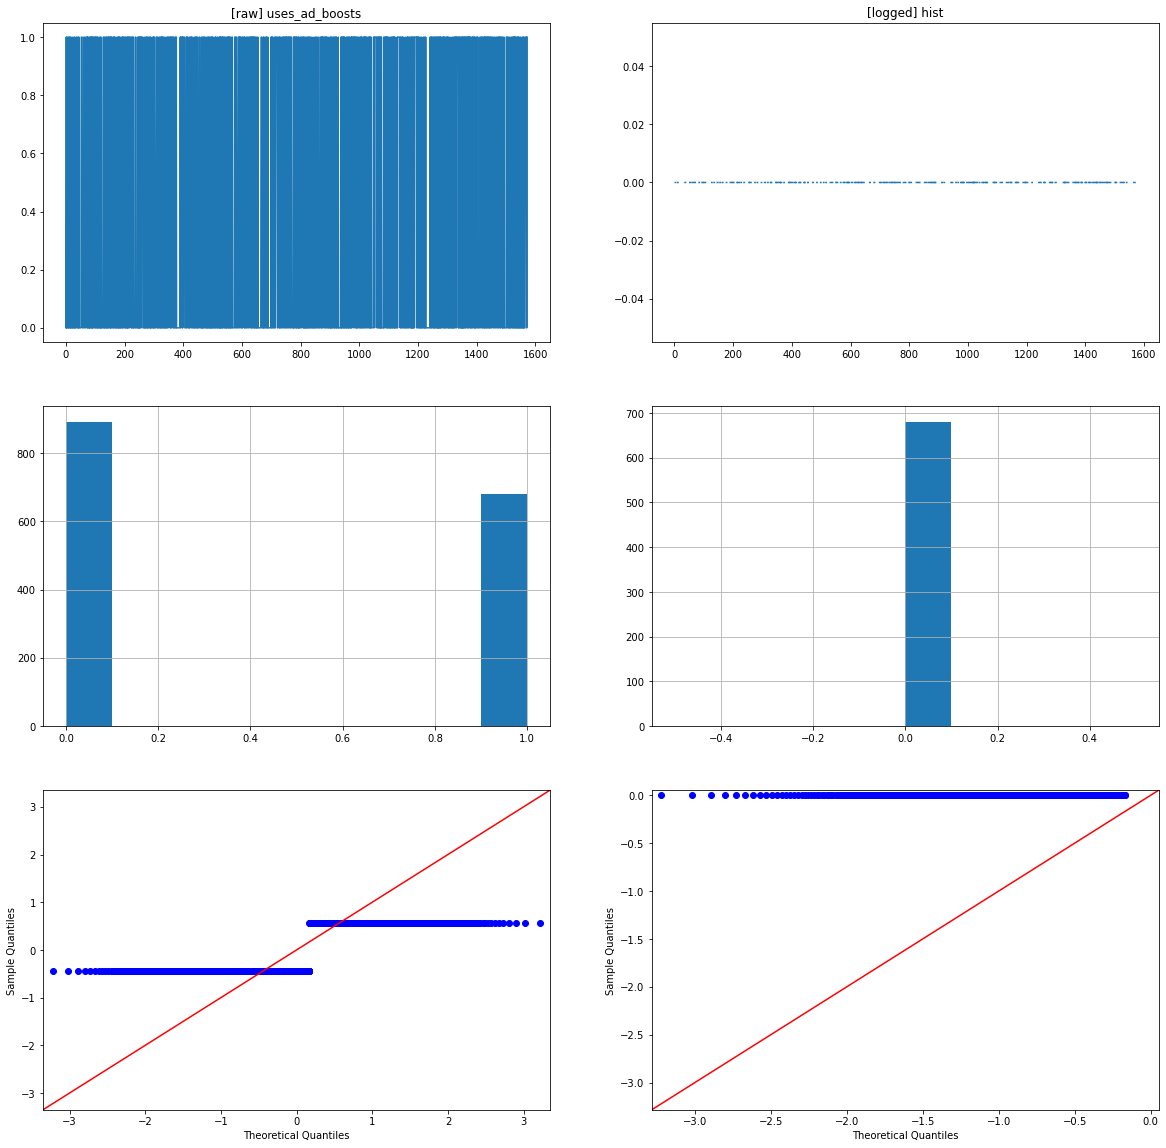

0    892
1    681
Name: uses_ad_boosts, dtype: int64


----------------------------------------------------------------------------------------------------
col = rating
----------------------------------------------------------------------------------------------------


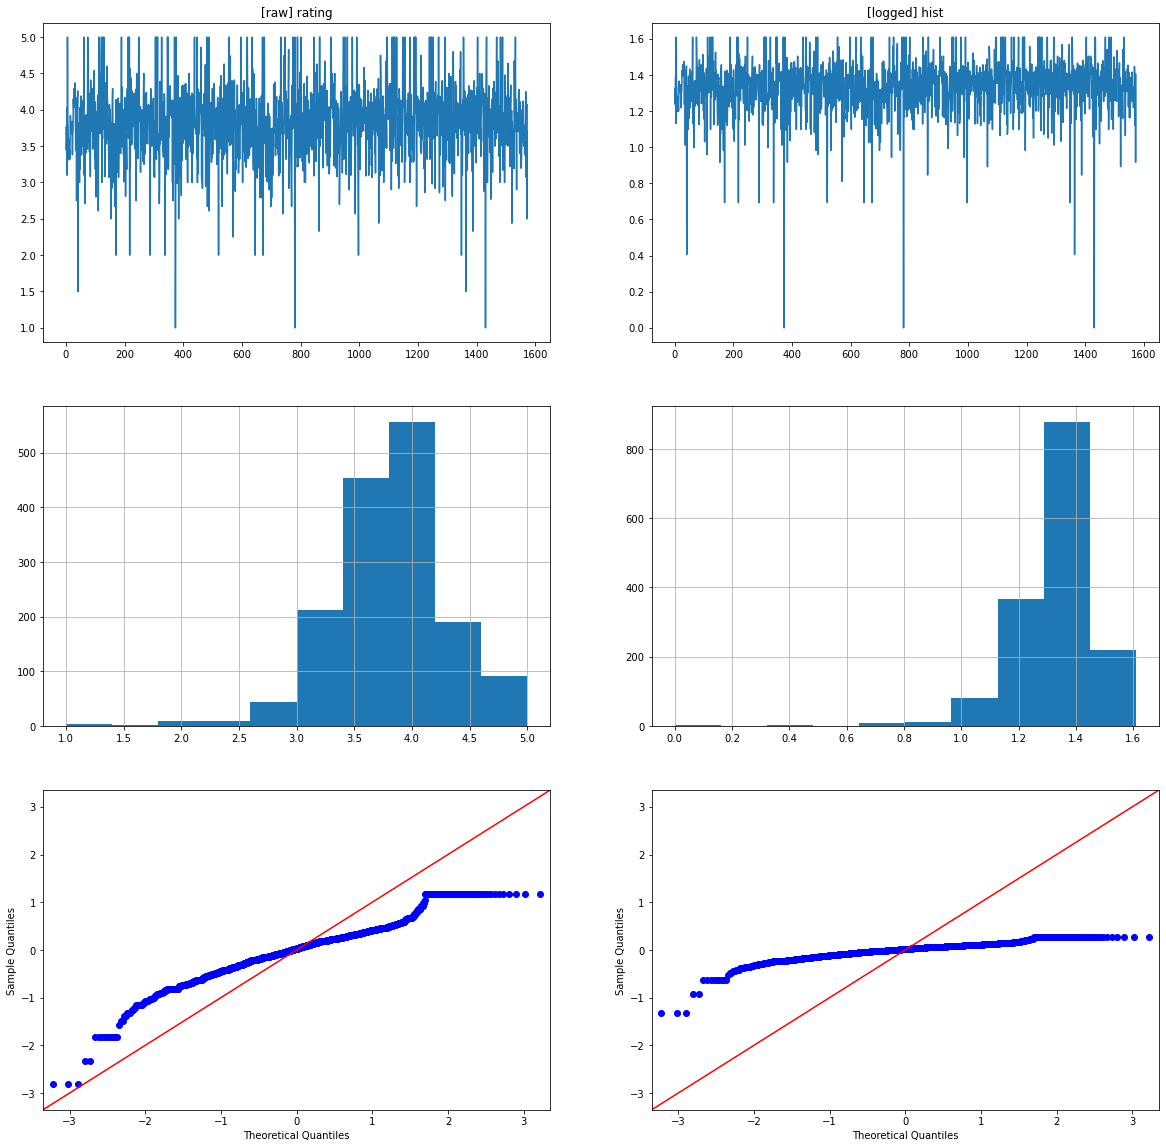

5.00    70
4.00    44
3.67    33
4.07    22
3.00    22
3.61    21
3.80    21
3.96    20
3.75    19
4.14    19
Name: rating, dtype: int64


----------------------------------------------------------------------------------------------------
col = rating_count
----------------------------------------------------------------------------------------------------


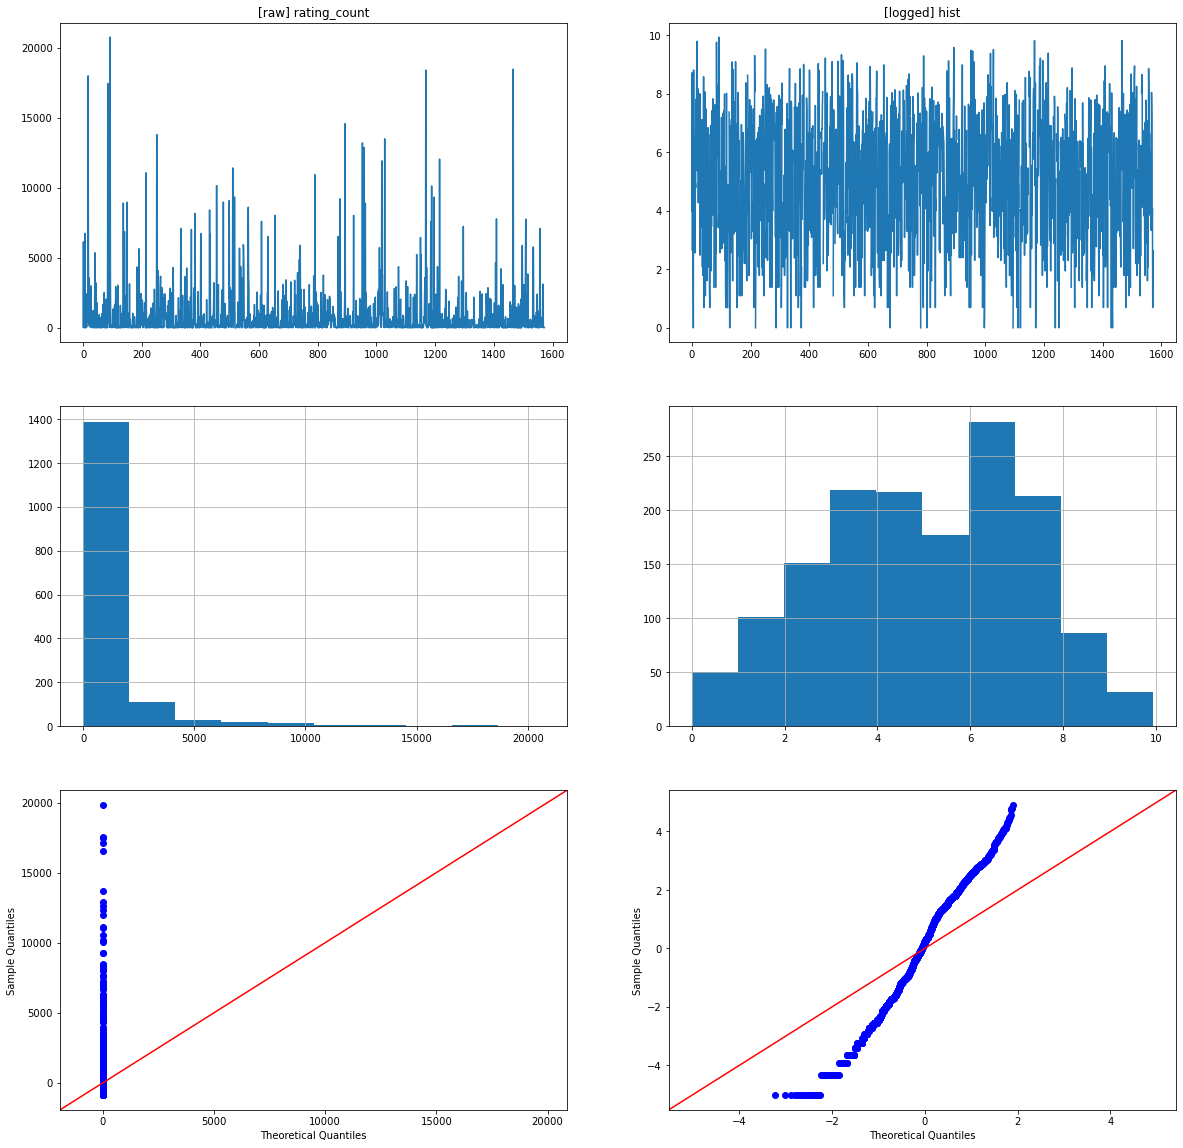

0     45
2     31
4     28
6     26
12    25
3     23
10    20
1     19
8     19
13    17
Name: rating_count, dtype: int64


----------------------------------------------------------------------------------------------------
col = rating_five_count
----------------------------------------------------------------------------------------------------


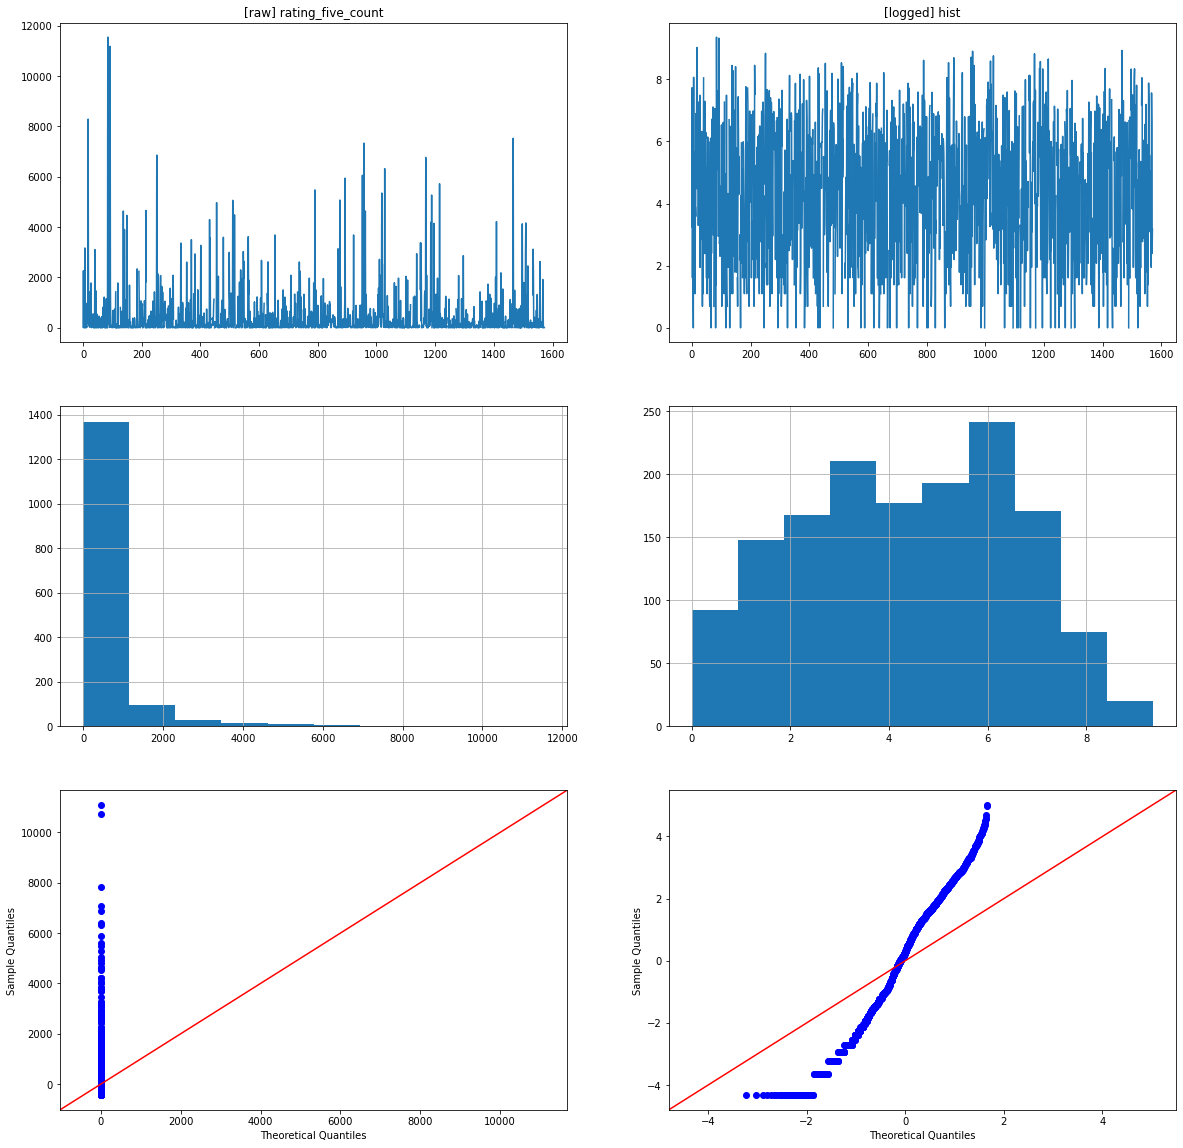

1.0     49
5.0     49
3.0     44
2.0     43
4.0     34
0.0     31
9.0     26
7.0     24
8.0     21
17.0    21
Name: rating_five_count, dtype: int64


----------------------------------------------------------------------------------------------------
col = rating_four_count
----------------------------------------------------------------------------------------------------


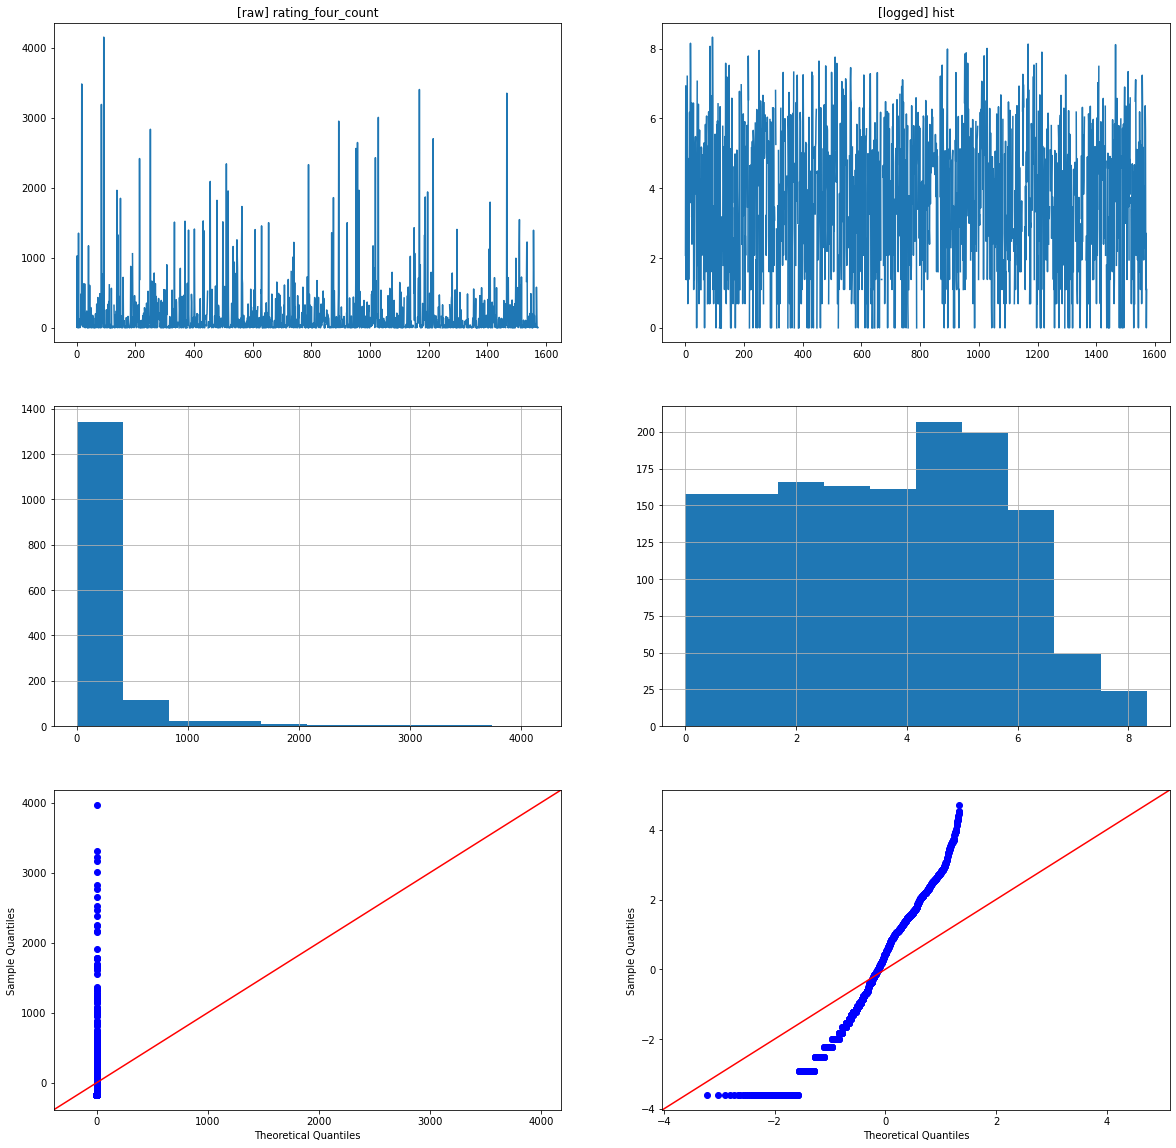

0.0     96
1.0     91
2.0     67
4.0     53
3.0     53
5.0     52
7.0     32
11.0    28
6.0     27
8.0     27
Name: rating_four_count, dtype: int64


----------------------------------------------------------------------------------------------------
col = rating_three_count
----------------------------------------------------------------------------------------------------


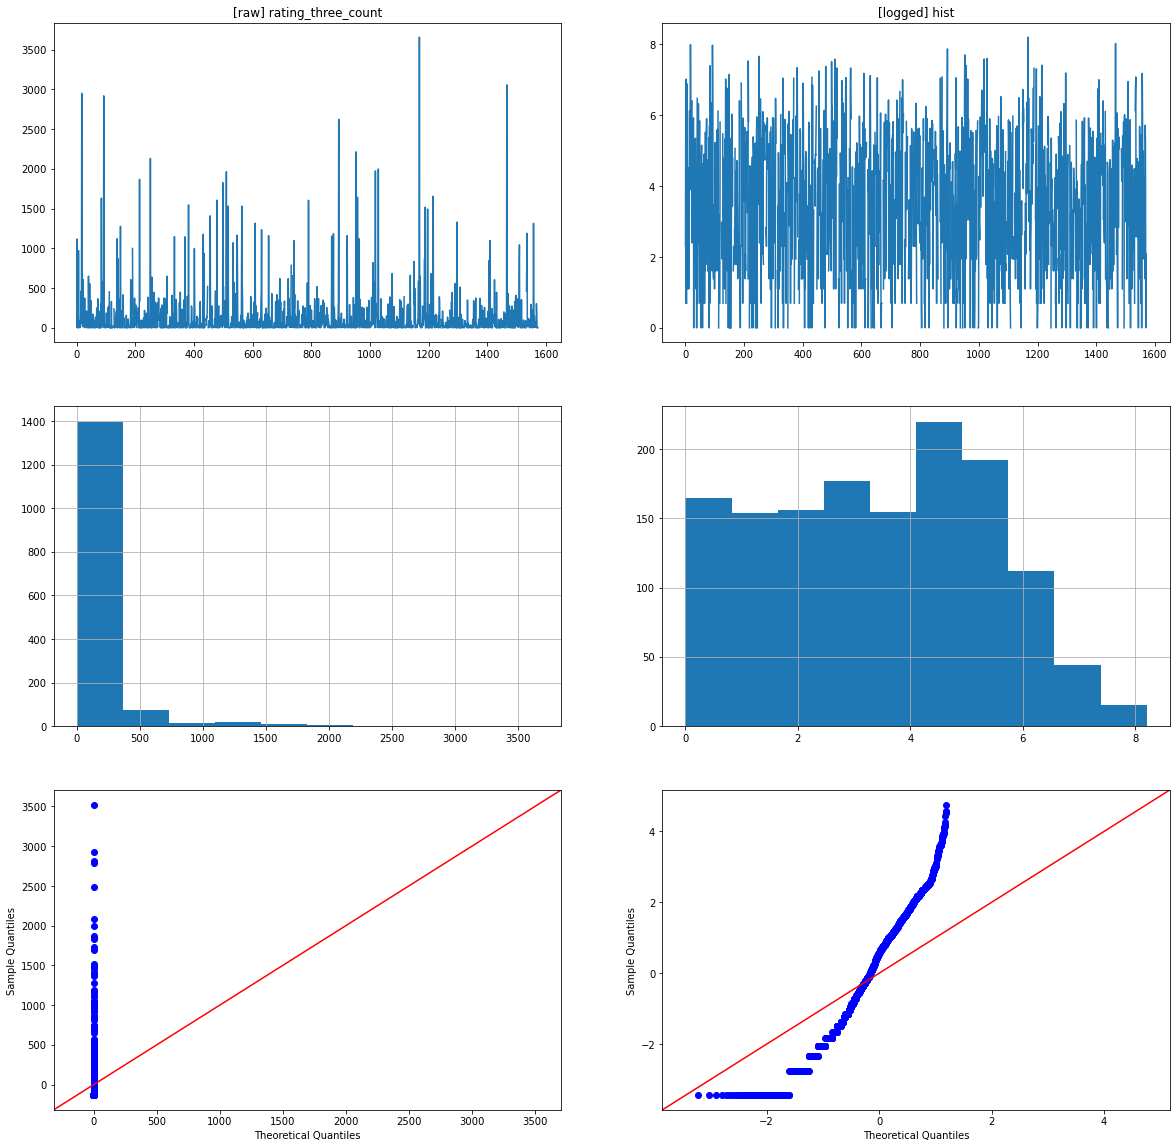

0.0     138
1.0      86
2.0      79
5.0      53
3.0      51
4.0      50
6.0      36
7.0      34
10.0     31
8.0      25
Name: rating_three_count, dtype: int64


----------------------------------------------------------------------------------------------------
col = rating_two_count
----------------------------------------------------------------------------------------------------


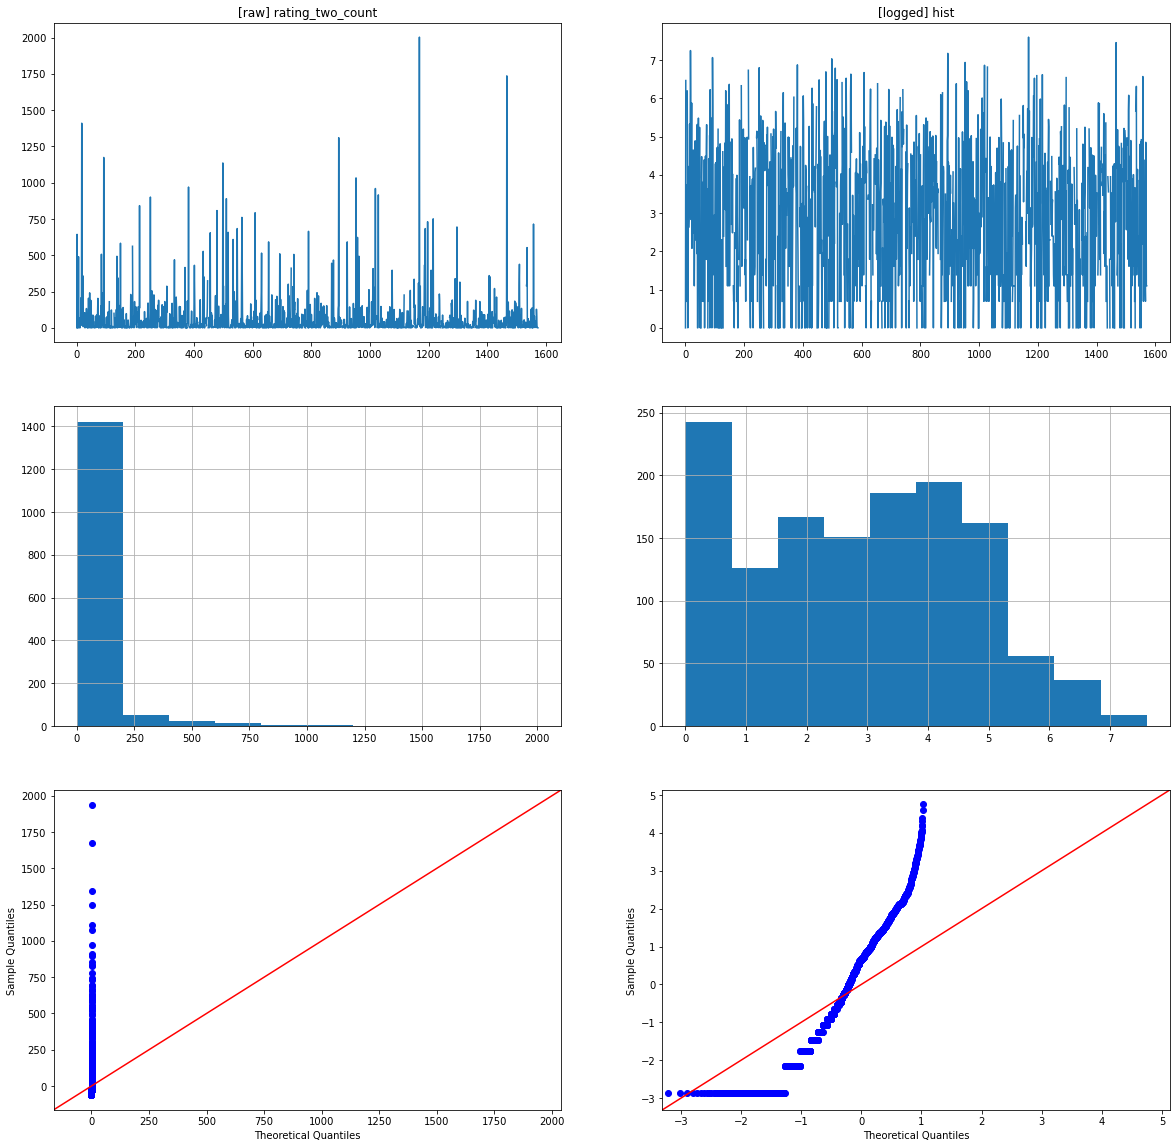

0.0    196
1.0    159
2.0     84
3.0     70
4.0     56
5.0     40
6.0     38
7.0     36
8.0     30
9.0     23
Name: rating_two_count, dtype: int64


----------------------------------------------------------------------------------------------------
col = rating_one_count
----------------------------------------------------------------------------------------------------


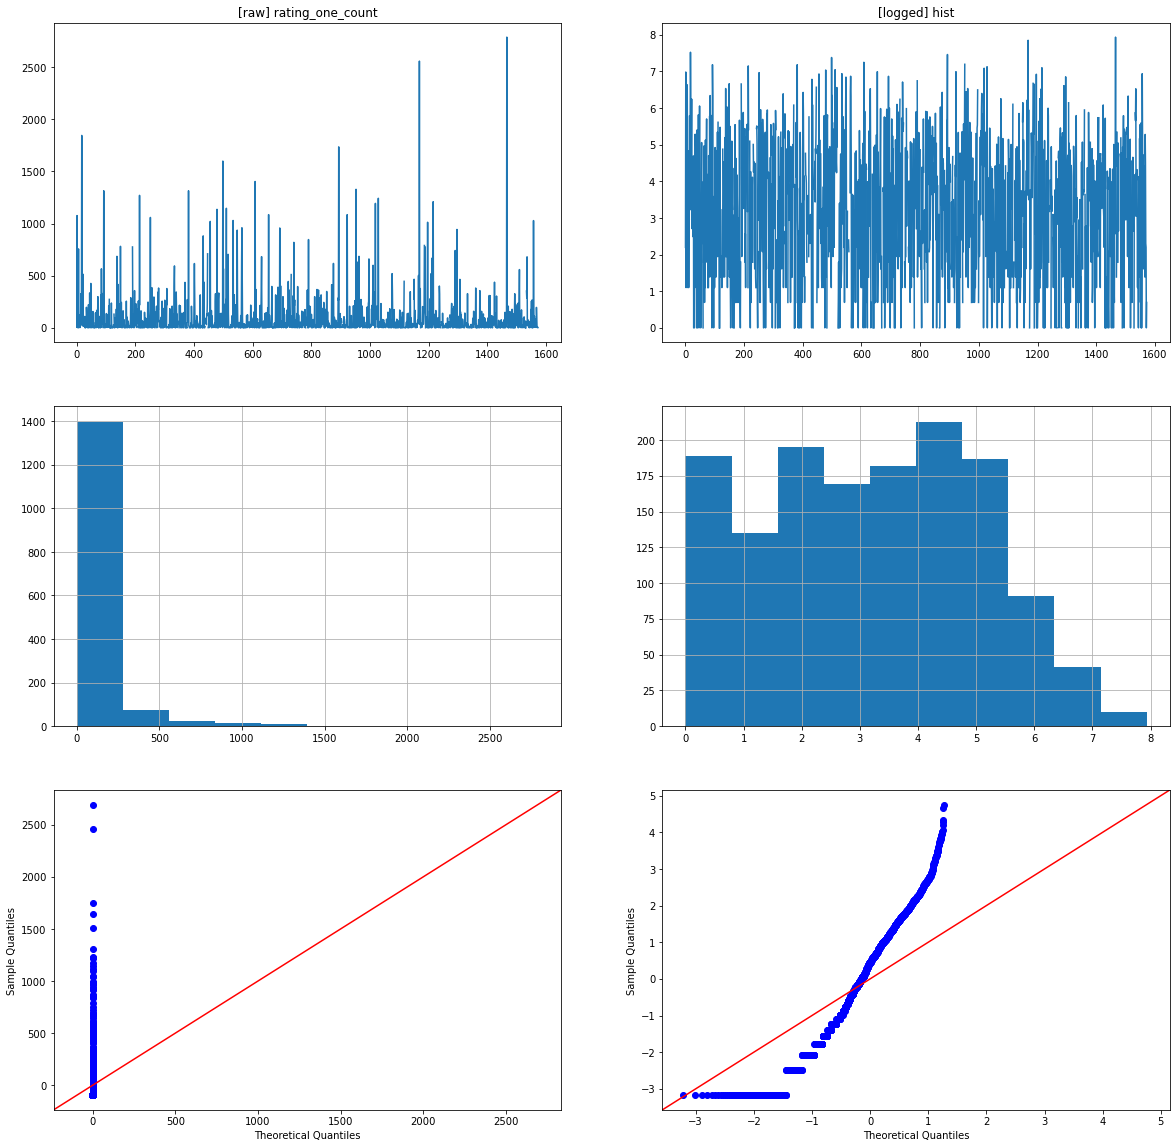

0.0    116
1.0    116
3.0     76
2.0     73
4.0     59
7.0     46
5.0     39
8.0     32
6.0     32
9.0     27
Name: rating_one_count, dtype: int64


----------------------------------------------------------------------------------------------------
col = badges_count
----------------------------------------------------------------------------------------------------


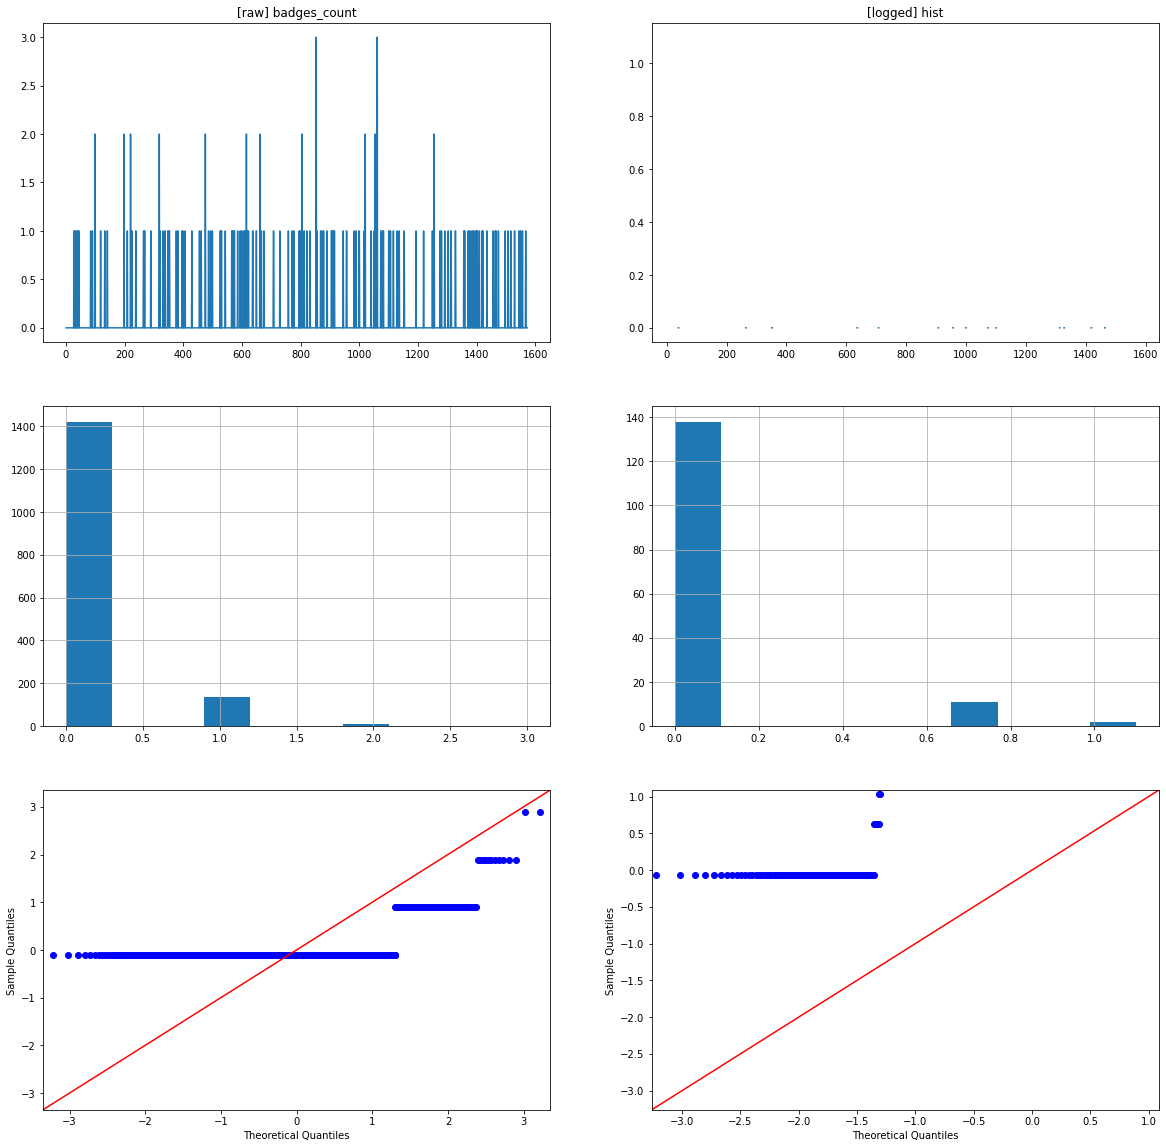

0    1422
1     138
2      11
3       2
Name: badges_count, dtype: int64


----------------------------------------------------------------------------------------------------
col = badge_local_product
----------------------------------------------------------------------------------------------------


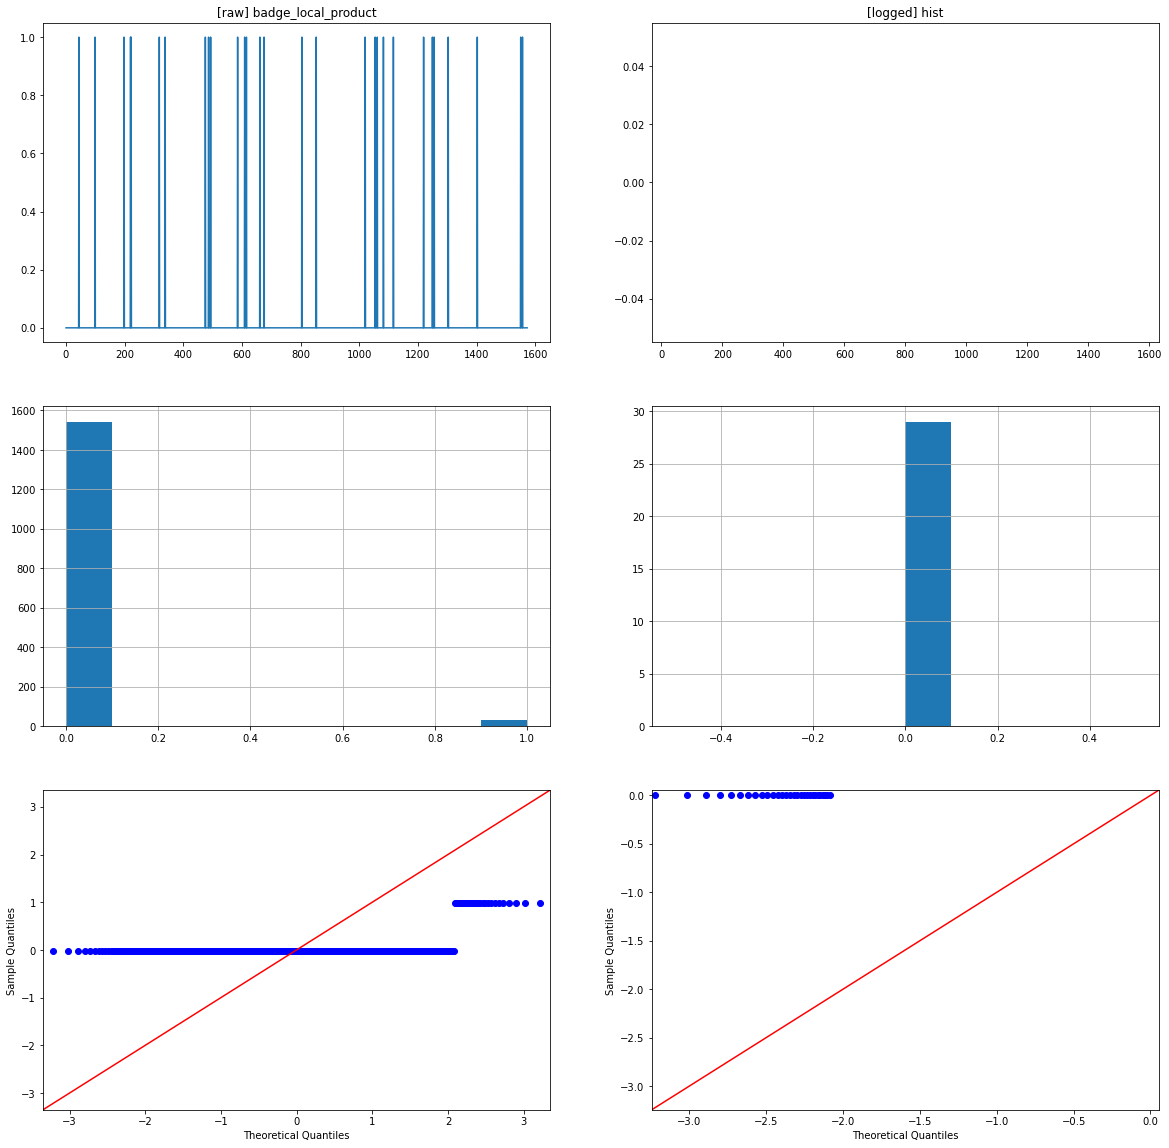

0    1544
1      29
Name: badge_local_product, dtype: int64


----------------------------------------------------------------------------------------------------
col = badge_product_quality
----------------------------------------------------------------------------------------------------


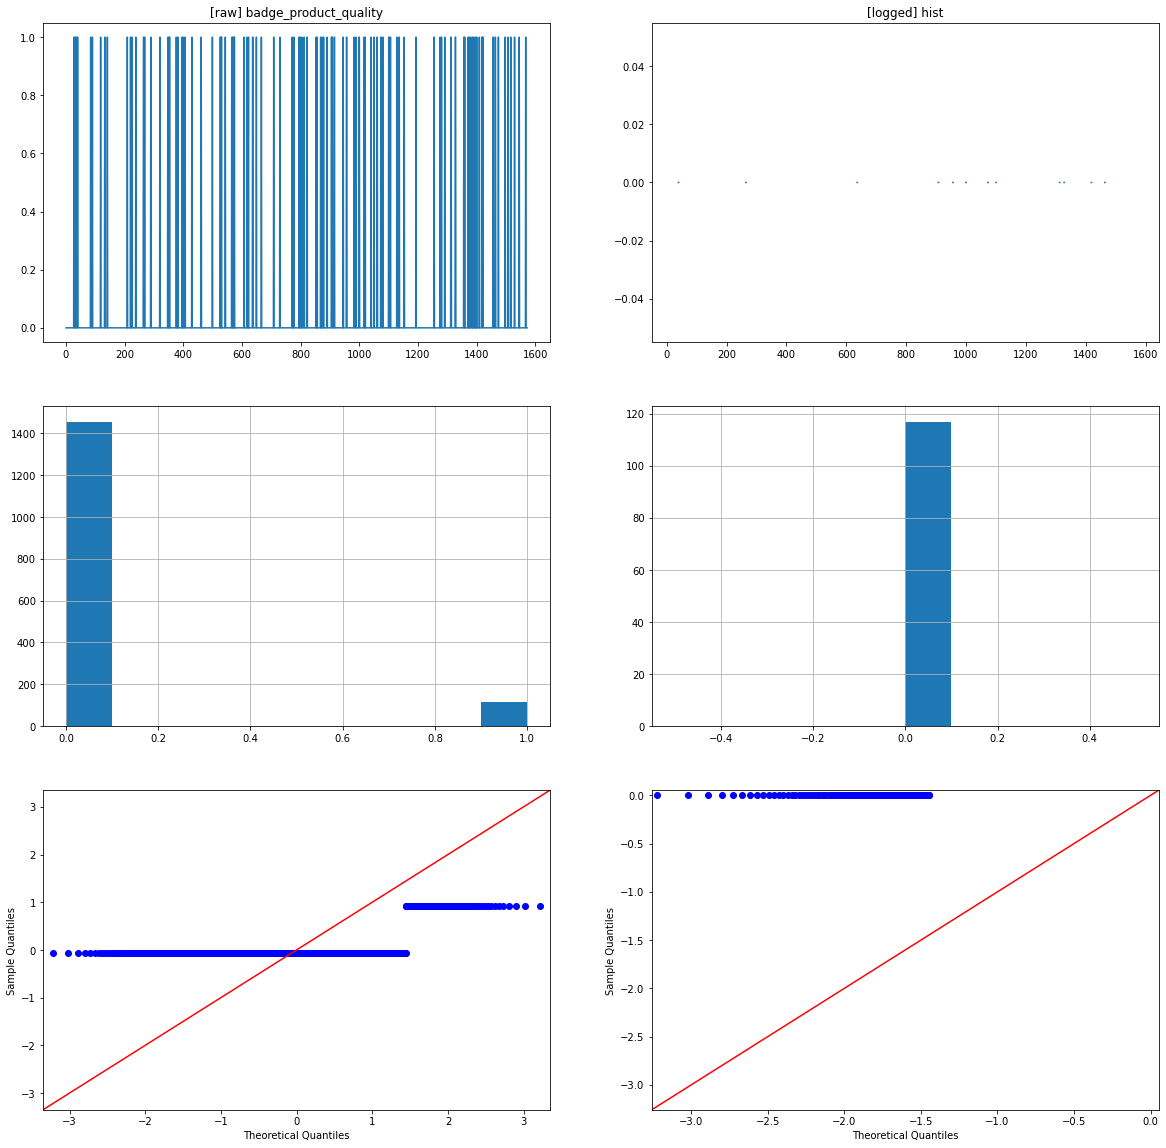

0    1456
1     117
Name: badge_product_quality, dtype: int64


----------------------------------------------------------------------------------------------------
col = badge_fast_shipping
----------------------------------------------------------------------------------------------------


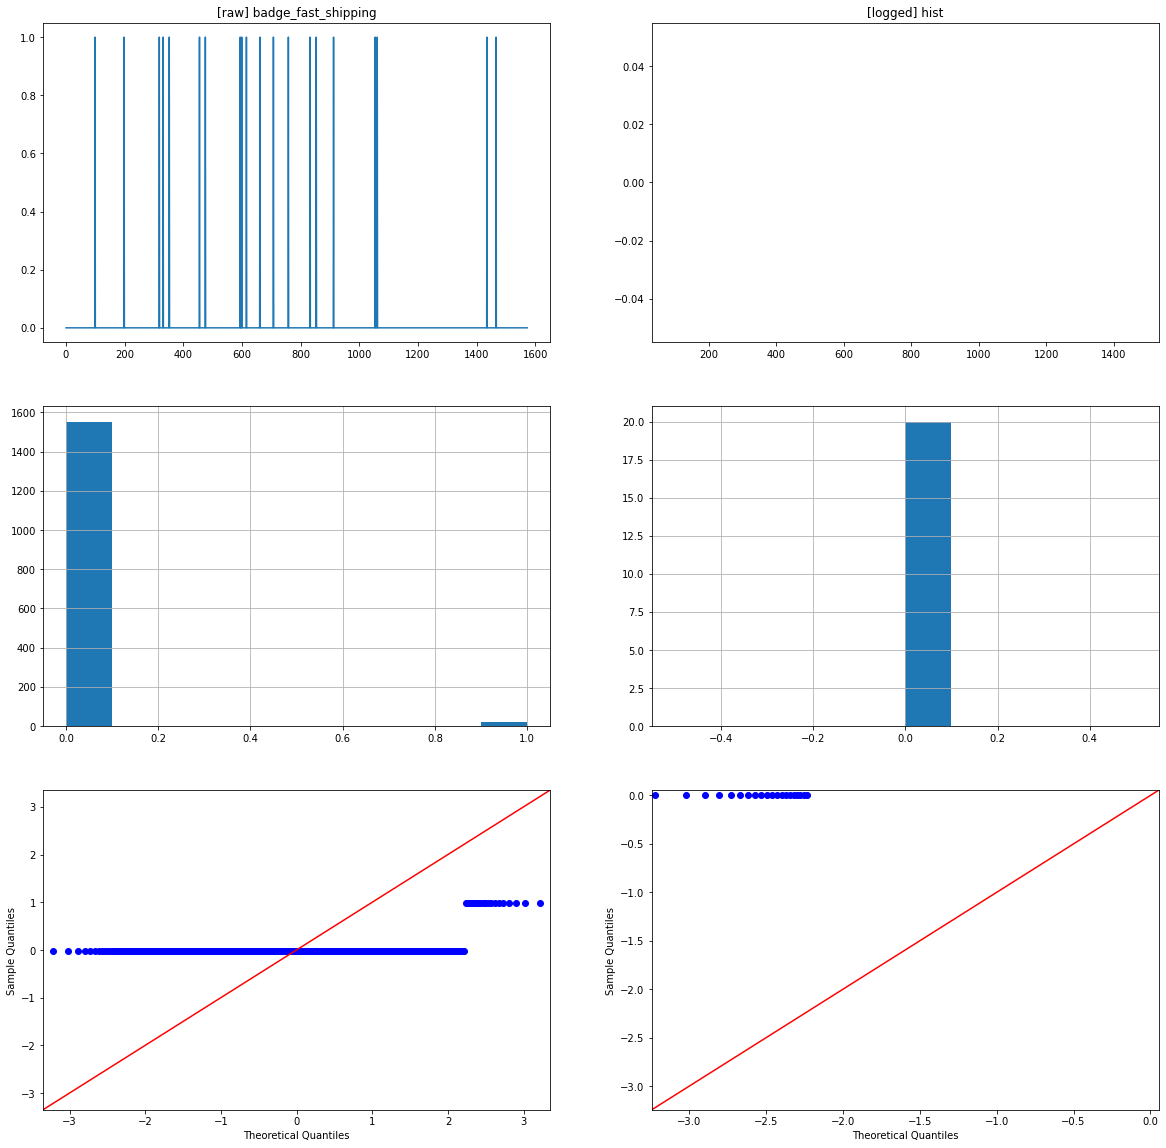

0    1553
1      20
Name: badge_fast_shipping, dtype: int64


----------------------------------------------------------------------------------------------------
col = tags
----------------------------------------------------------------------------------------------------
number of uniques = 1230

["Summer,Fashion,womenunderwearsuit,printedpajamasset,womencasualshort,Women's Fashion,flamingo,loungewearset,Casual,Shirt,casualsleepwear,Shorts,flamingotshirt,Elastic,Vintage,Tops,tshirtandshortsset,Women,Sleepwear,Print,womenpajamasset,womennightwear,Pajamas,womensleepwearset"
 "Mini,womens dresses,Summer,Patchwork,fashion dress,Dress,Mini dress,Women's Fashion,Women S Clothing,backless,party,summer dresses,sleeveless,sexy,Casual"
 "Summer,cardigan,women beachwear,chiffon,Sexy women,Coat,summercardigan,openfront,short sleeves,Swimsuit,Women's Fashion,leaf,Green,printed,Spring,longcardigan,Women,Beach,kimono"
 ...
 "bohemia,Plus Size,dandelionfloralprinted,short sleeves,yoga top,bohotshirt,Cool T-Shirts,Women's Fashion,Fashion,short sleeve shirt,Ca

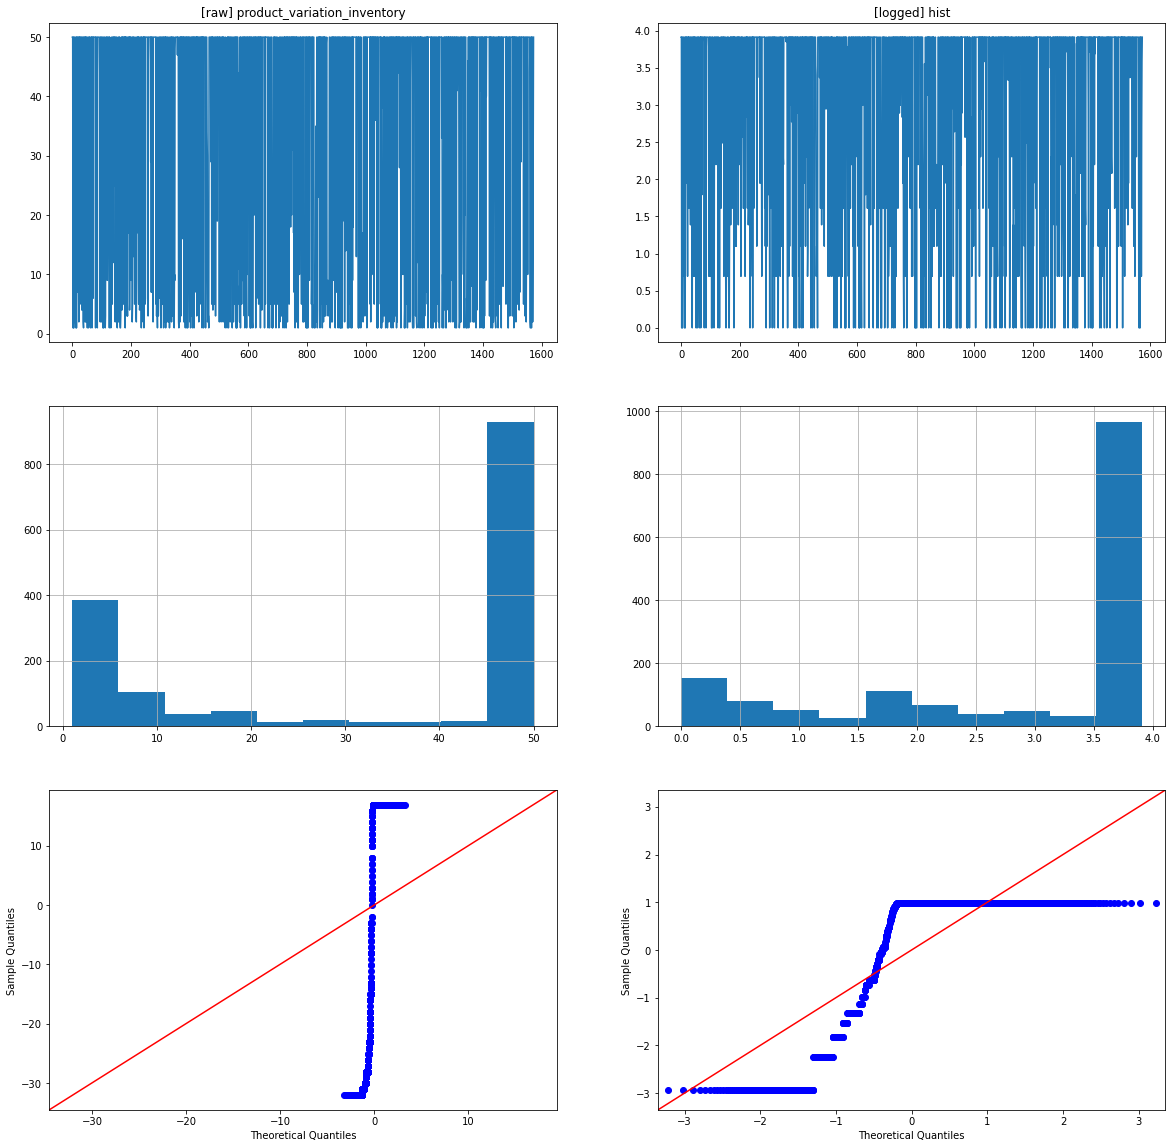

50    907
1     152
2      81
5      74
3      52
10     40
4      25
9      22
6      18
7      18
Name: product_variation_inventory, dtype: int64


----------------------------------------------------------------------------------------------------
col = shipping_option_name
----------------------------------------------------------------------------------------------------
number of uniques = 15

['Livraison standard' 'Envio Padrão' 'Standart Gönderi' 'Standardversand'
 'Envío normal' 'Standardowa wysyłka' 'الشحن القياسي' 'Expediere Standard'
 'การส่งสินค้ามาตรฐาน' 'Standard Shipping' 'ការដឹកជញ្ជូនតាមស្តង់ដារ'
 'Livraison Express' 'Стандартная доставка' 'Spedizione standard'
 'Ekspresowa wysyłka']

----------------------------------------------------------------------------------------------------
col = shipping_option_price
----------------------------------------------------------------------------------------------------


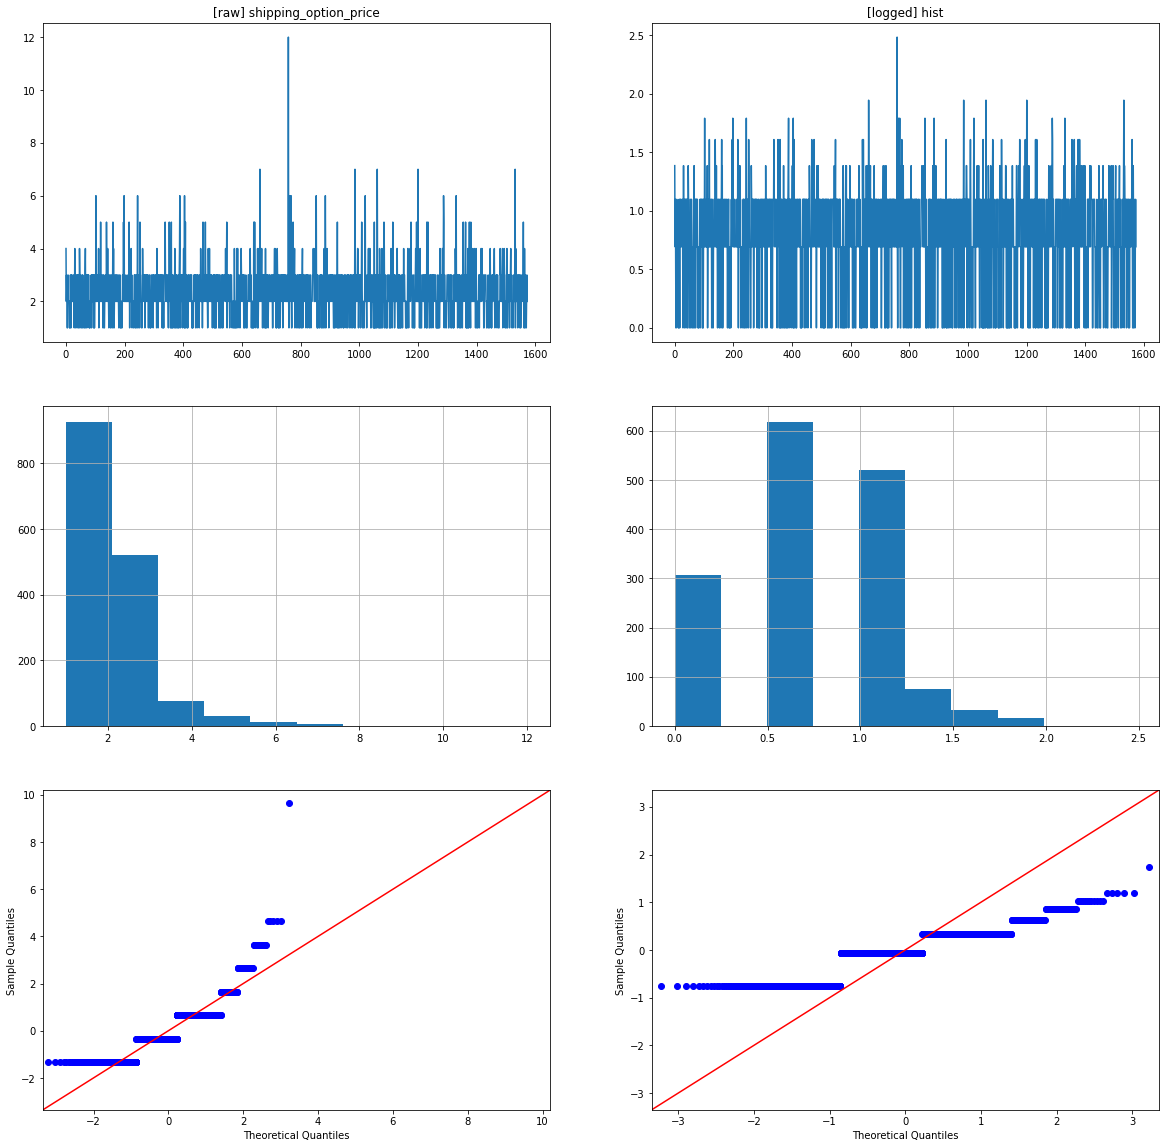

2     619
3     520
1     308
4      76
5      32
6      12
7       5
12      1
Name: shipping_option_price, dtype: int64


----------------------------------------------------------------------------------------------------
col = shipping_is_express
----------------------------------------------------------------------------------------------------


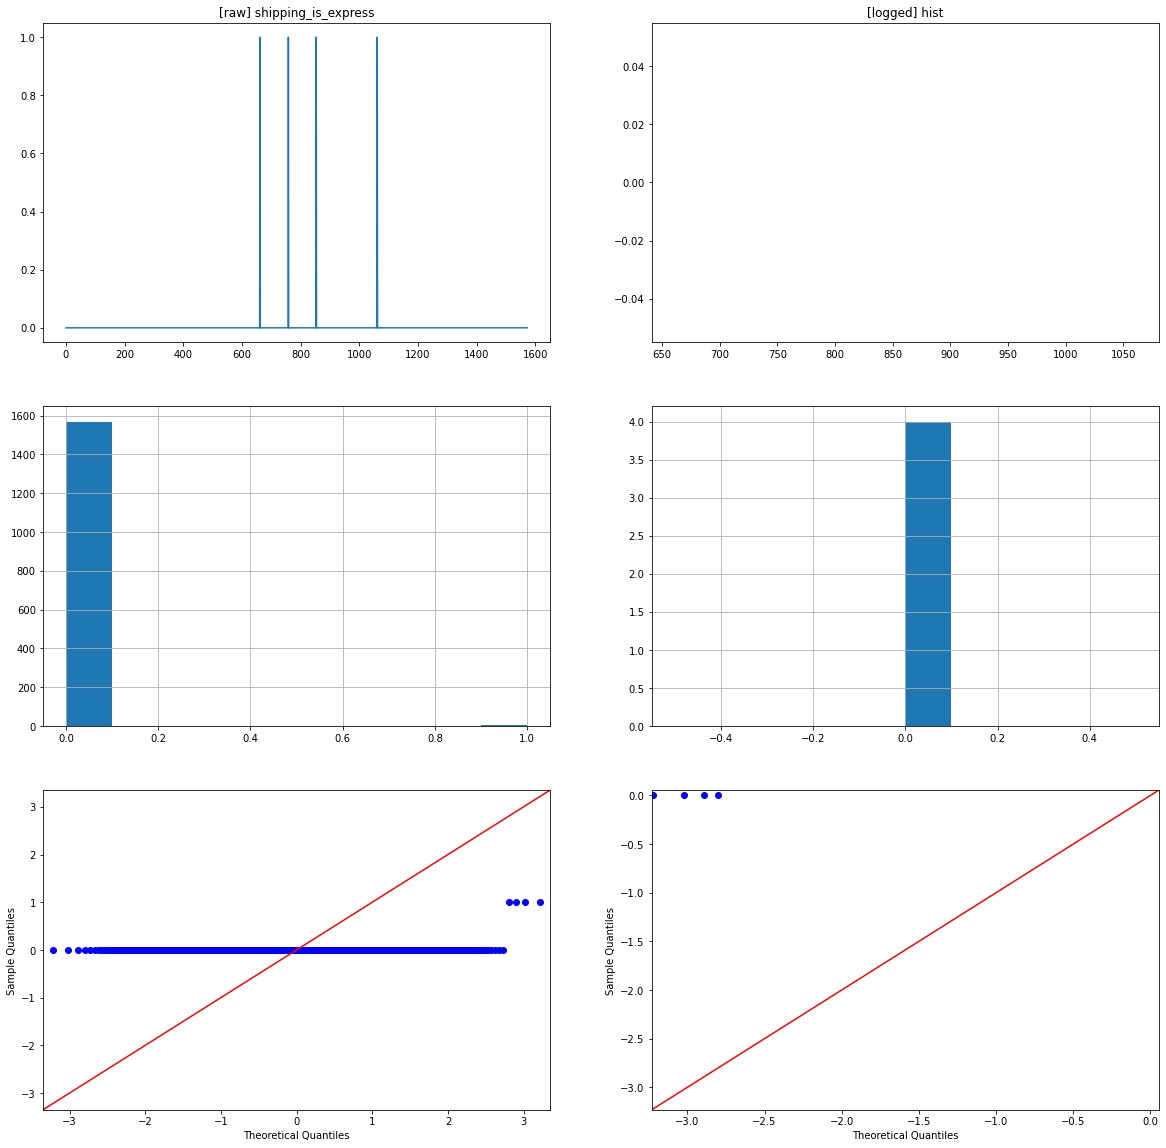

0    1569
1       4
Name: shipping_is_express, dtype: int64


----------------------------------------------------------------------------------------------------
col = countries_shipped_to
----------------------------------------------------------------------------------------------------


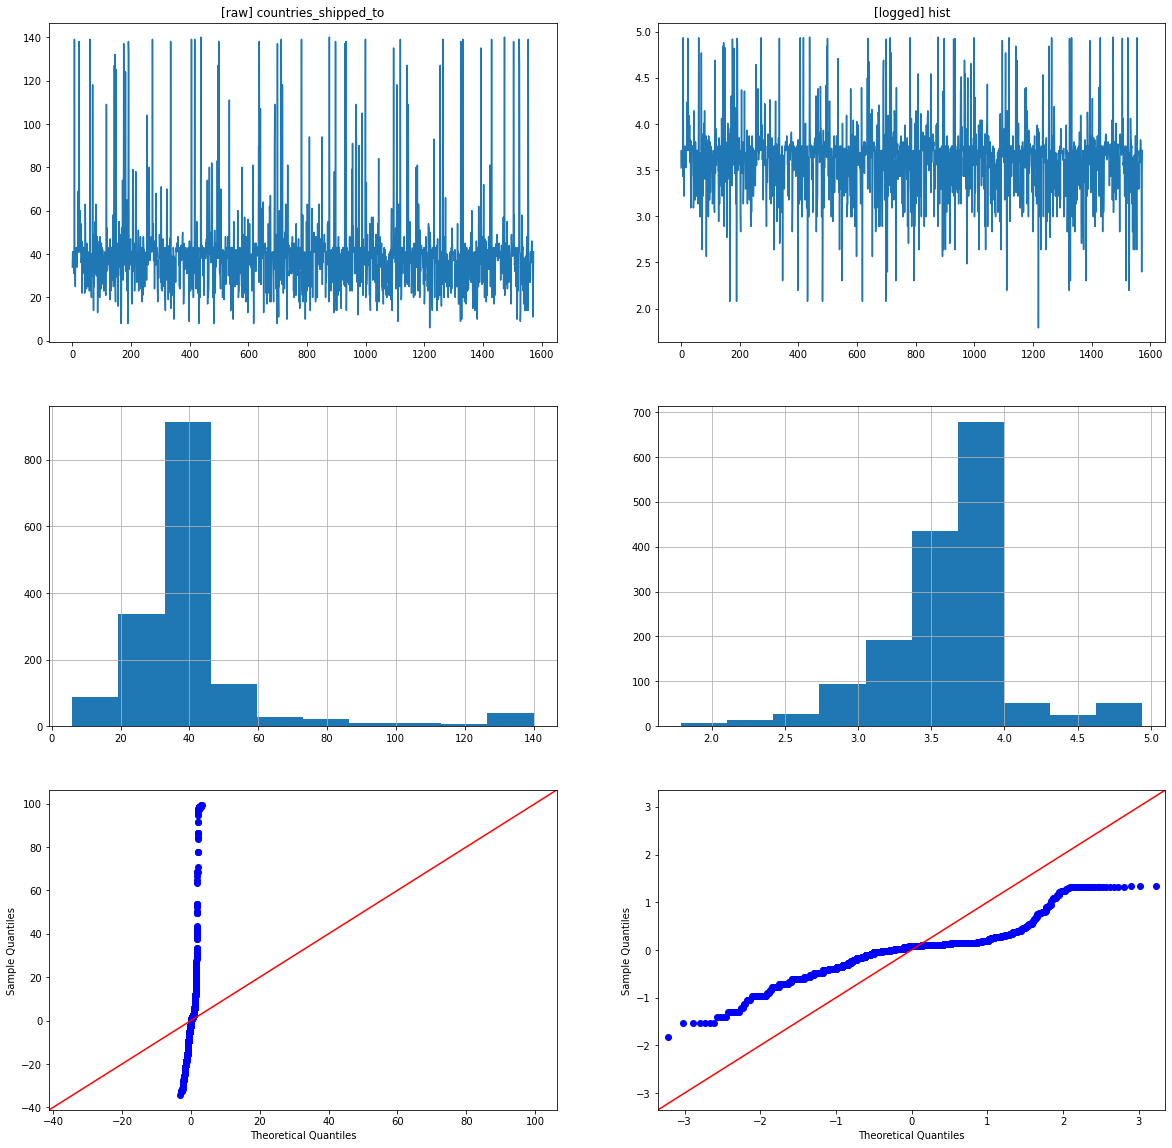

41    171
43    170
40    106
38     76
36     64
35     61
42     57
39     43
25     39
37     38
Name: countries_shipped_to, dtype: int64


----------------------------------------------------------------------------------------------------
col = inventory_total
----------------------------------------------------------------------------------------------------


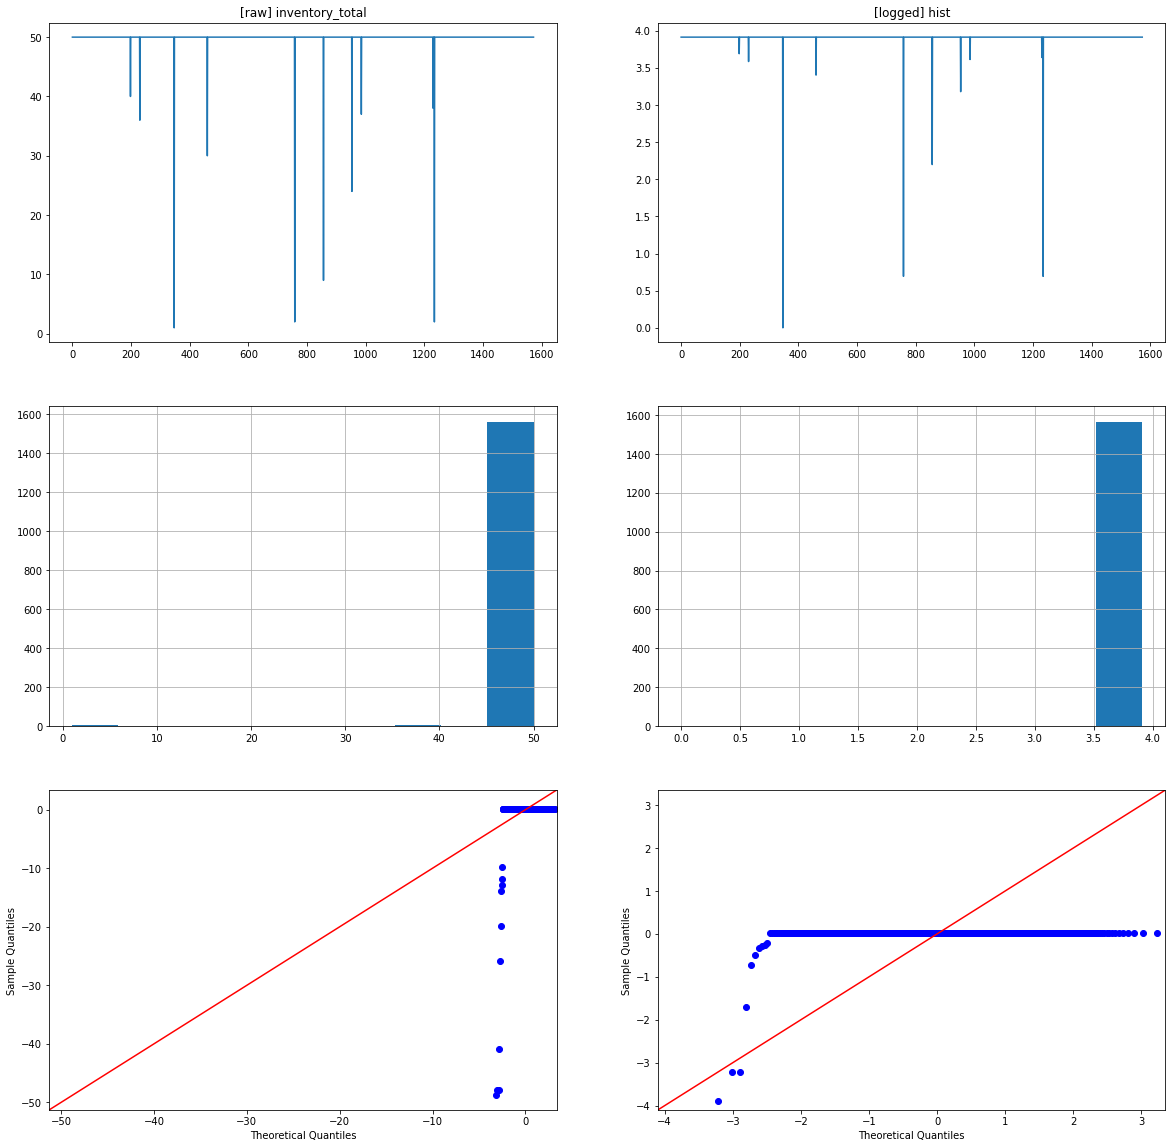

50    1563
2        2
1        1
9        1
24       1
30       1
36       1
37       1
38       1
40       1
Name: inventory_total, dtype: int64


----------------------------------------------------------------------------------------------------
col = has_urgency_banner
----------------------------------------------------------------------------------------------------


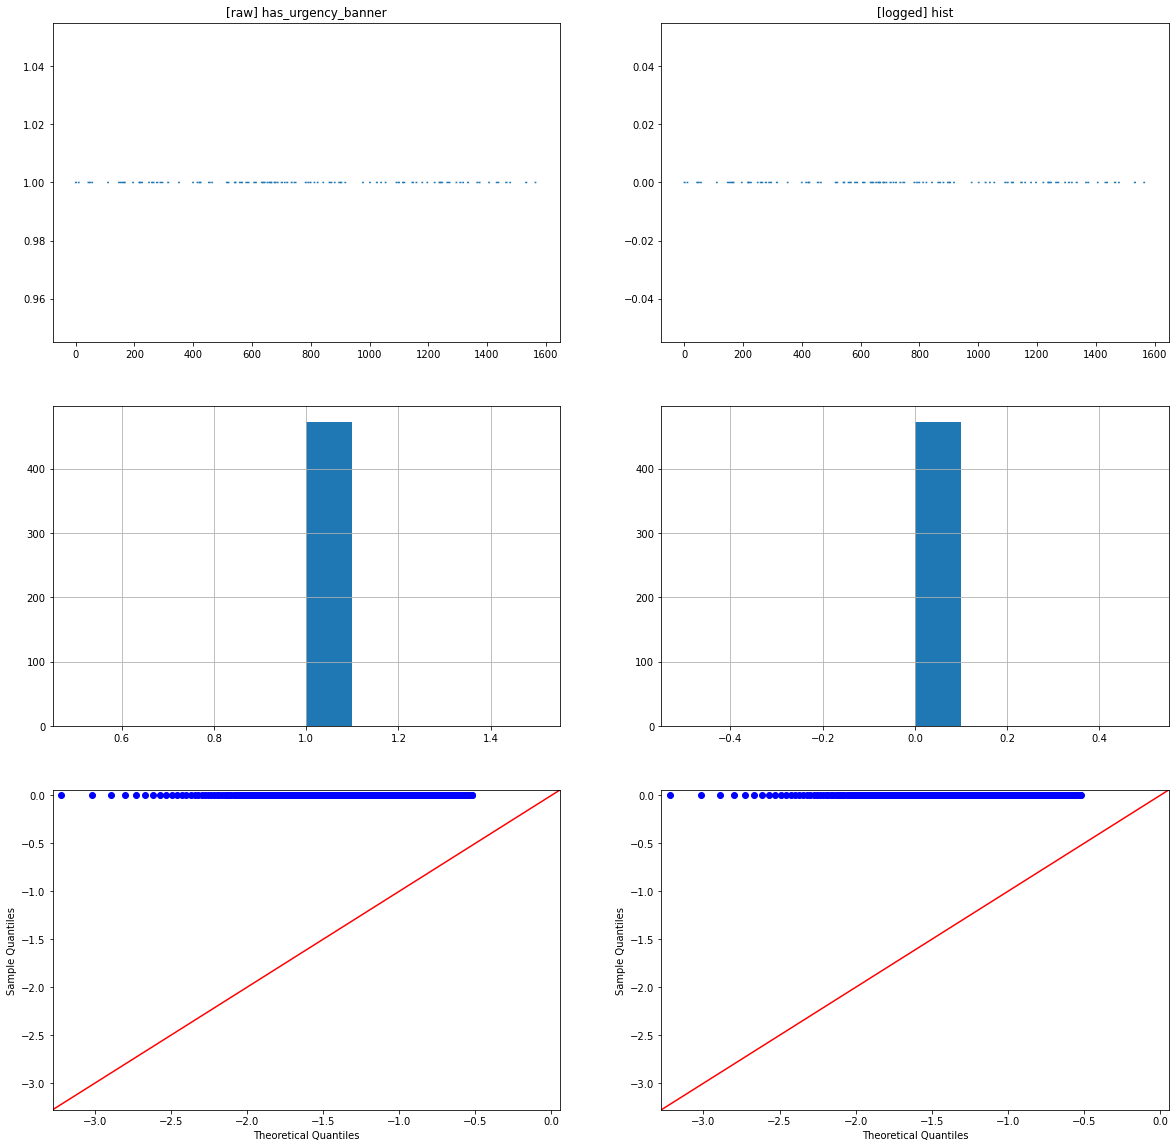

1.0    473
Name: has_urgency_banner, dtype: int64


----------------------------------------------------------------------------------------------------
col = urgency_text
----------------------------------------------------------------------------------------------------
number of uniques = 3

['Quantité limitée !' nan 'Réduction sur les achats en gros']

----------------------------------------------------------------------------------------------------
col = origin_country
----------------------------------------------------------------------------------------------------
number of uniques = 7

['CN' 'US' nan 'VE' 'AT' 'SG' 'GB']

----------------------------------------------------------------------------------------------------
col = merchant_title
----------------------------------------------------------------------------------------------------
number of uniques = 958

['zgrdejia' 'SaraHouse' 'hxt520' 'allenfan' 'youngpeopleshop'
 'zhoulinglinga' 'Unique Li Fashion Shop' 'So Band' 'chenxiangjunjun'
 'Luowei clothe' 'mayuhiao' '

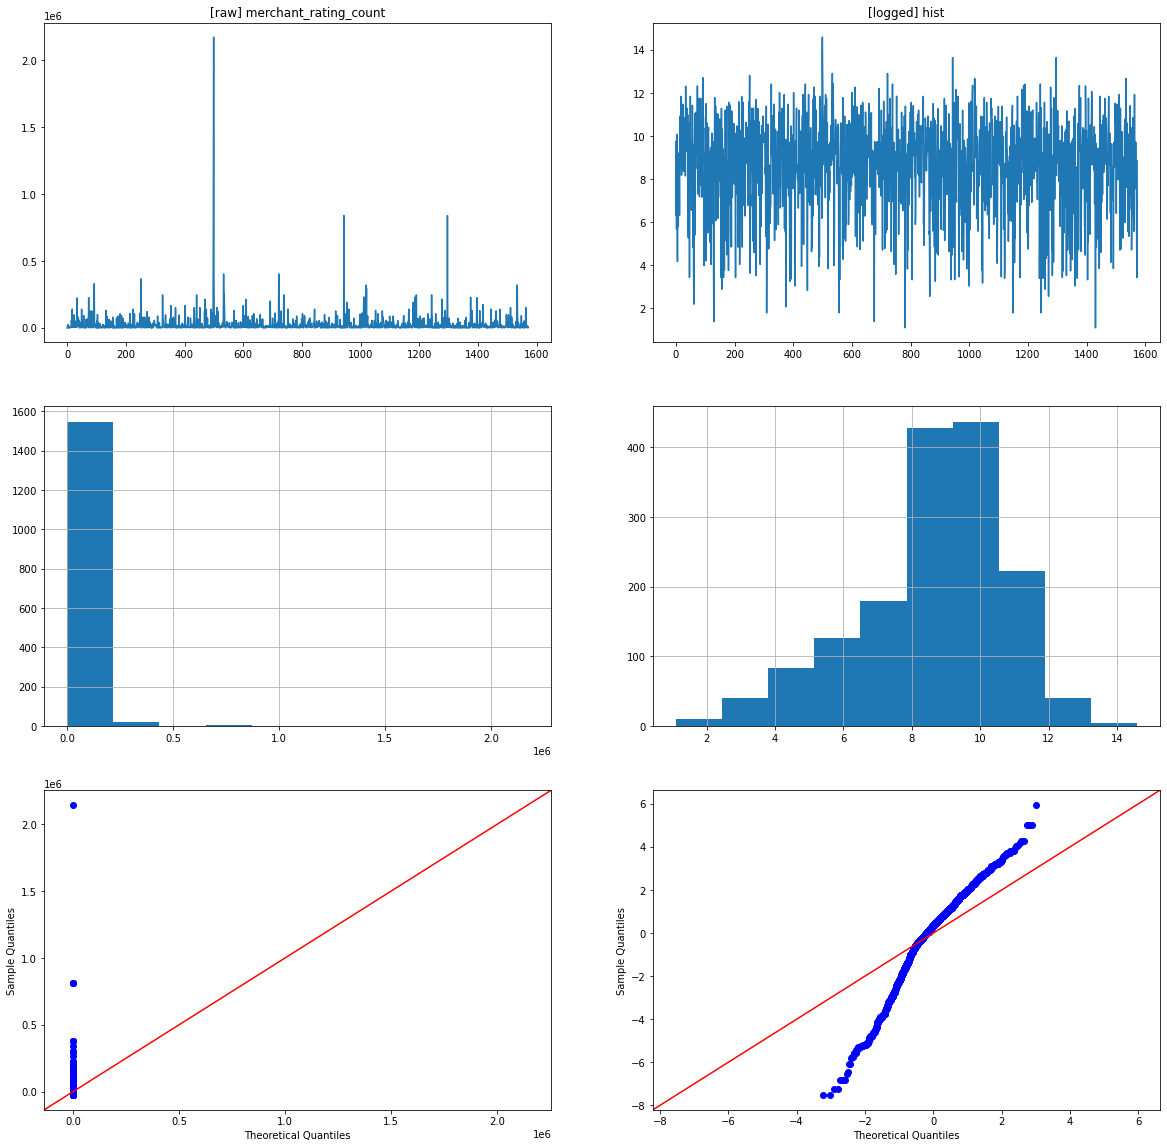

32168    15
12309    12
80093     9
42919     8
88193     8
10600     8
31        7
55499     7
10474     6
55670     6
Name: merchant_rating_count, dtype: int64


----------------------------------------------------------------------------------------------------
col = merchant_rating
----------------------------------------------------------------------------------------------------


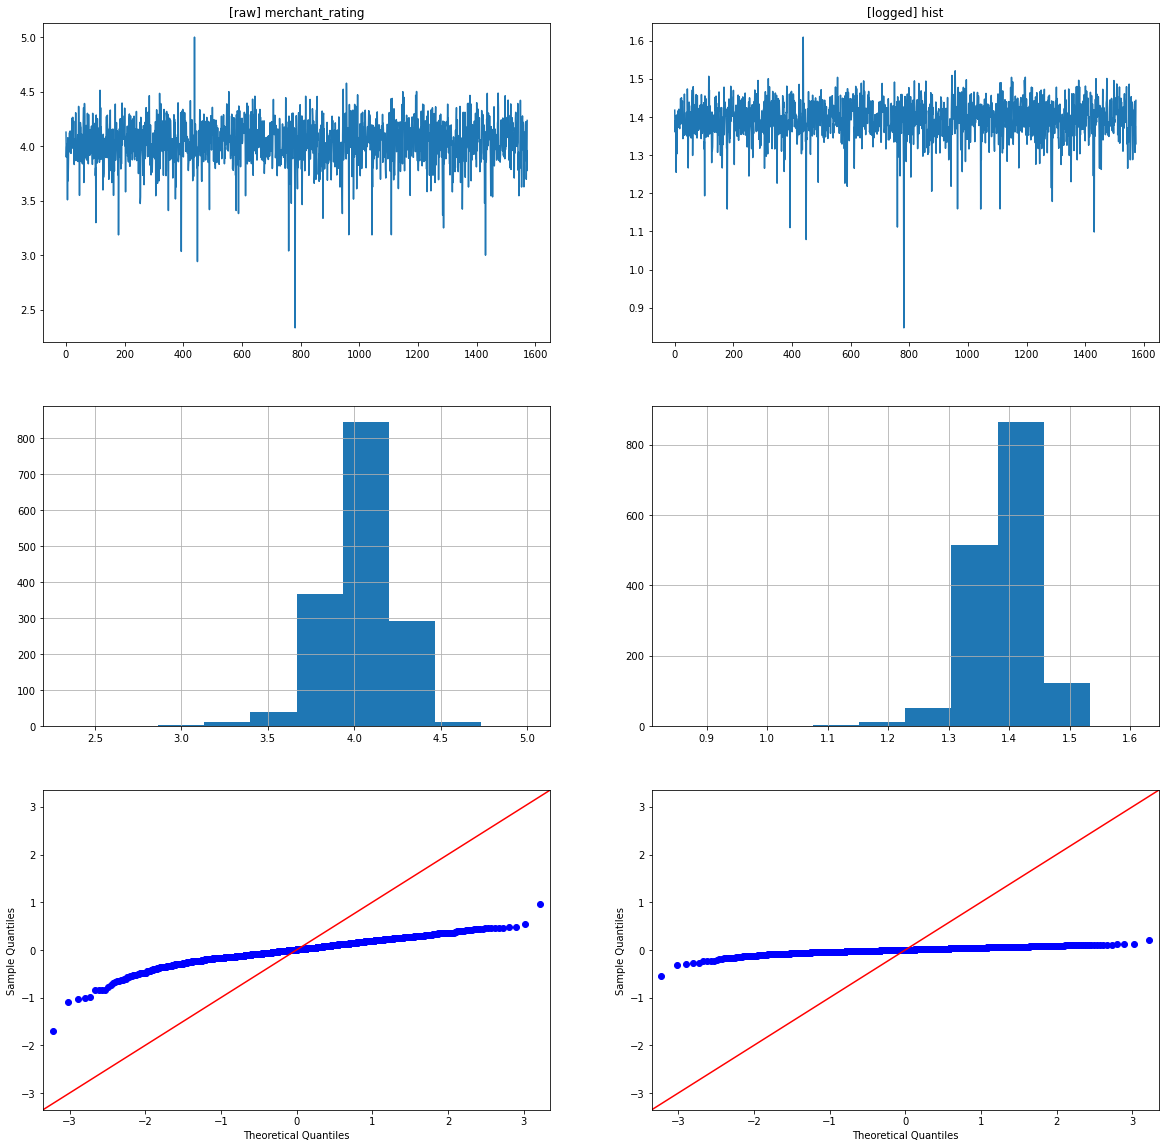

3.884544    15
4.045170    12
4.006692     9
4.080891     8
3.867547     8
4.105967     8
4.138885     7
3.958790     6
4.121484     6
4.146957     6
Name: merchant_rating, dtype: int64


----------------------------------------------------------------------------------------------------
col = merchant_id
----------------------------------------------------------------------------------------------------
number of uniques = 958

['595097d6a26f6e070cb878d1' '56458aa03a698c35c9050988'
 '5d464a1ffdf7bc44ee933c65' '58cfdefdacb37b556efdff7c'
 '5ab3b592c3911a095ad5dadb' '5e4b9c3801ba9d210036fc5a'
 '5652f4053a698c76dc9a3f37' '5d45349676befe65691dcfbb'
 '5d42980e8388970d32294ddc' '5ba2251b4315d12ebce873fa'
 '5952a218e81e8a4c30b5bbbc' '56cd27b048e91e13aa3986e4'
 '5d3c419de4b65d4fb81e7286' '566eaa533a698c6442549a74'
 '5926c5ace8ff5525241b368d' '566012f6769a5629aefca555'
 '5b8beef49996c87b299cdbec' '5708773c3c02161b3f8c7900'
 '59cdc2112351344fc0dfa54f' '5ae296b6cd968d66be12d247'
 '5576bb43de4a8c24953ae98f' '55ed5a3362e273427107759e'
 '5ae93337d204cc177313f242' '5cb636dda7173671aedef051'
 '583138b06339b410ab9663ec' '575cfe470551415caa5505b5'
 '5a0fe8770a332a615df86c5e' '56c6f731bc

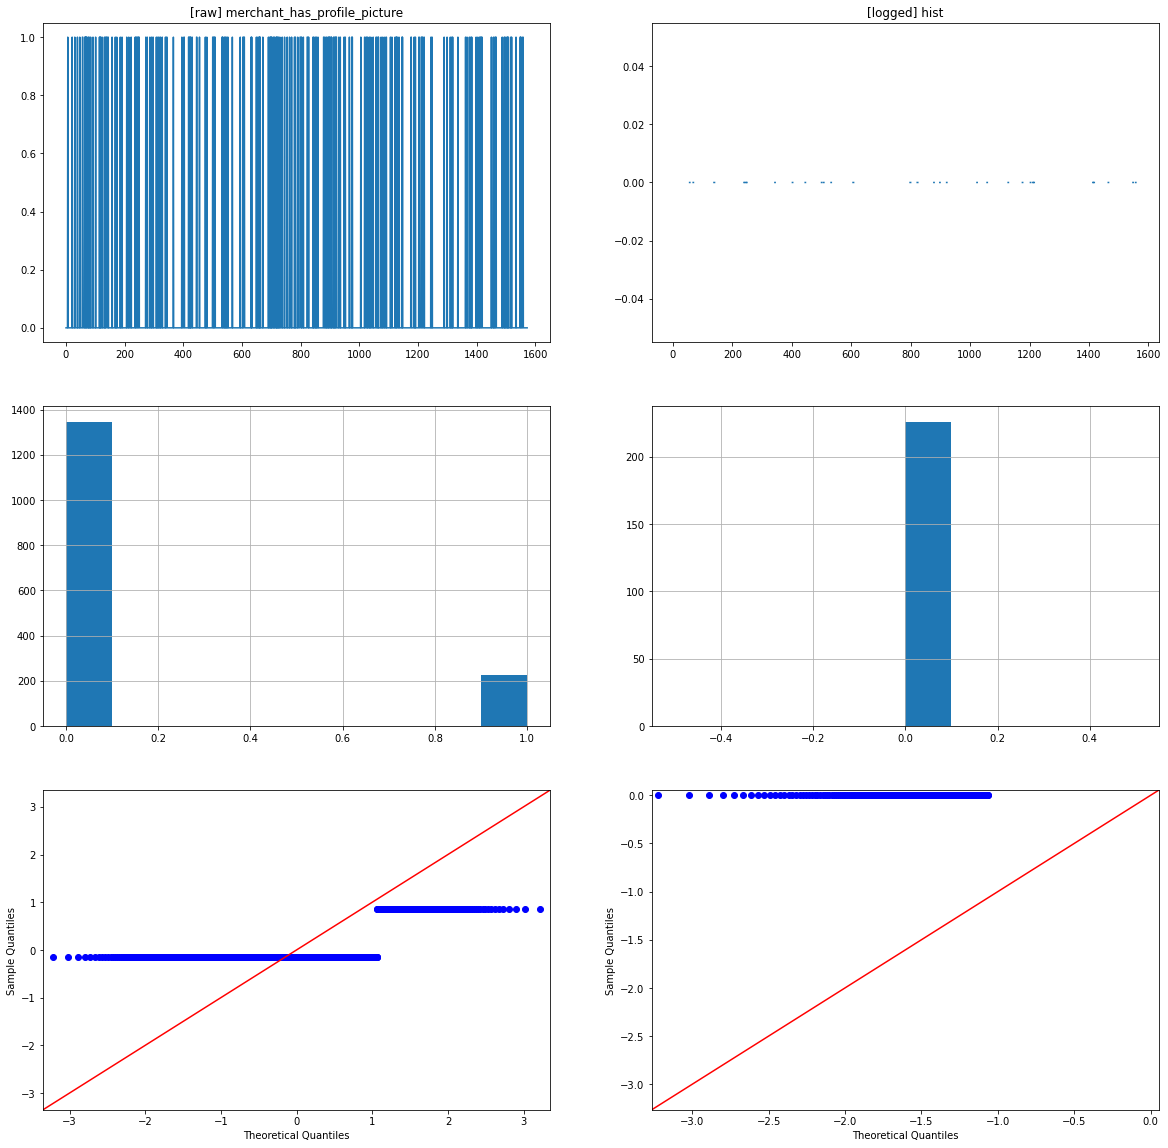

0    1347
1     226
Name: merchant_has_profile_picture, dtype: int64


----------------------------------------------------------------------------------------------------
col = merchant_profile_picture
----------------------------------------------------------------------------------------------------
number of uniques = 126

[nan
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5652f4053a698c76dc9a3f37.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55ed5a3362e273427107759e.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_539937d634067e06707b1a8e.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_57108cd6a995b507211ef8fb.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5268759b736046671957190c.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5660e53e769a564b3e3aeca0.jpg'
 'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55e7e41e606d0a18fdfc67d1.jpg'
 'https://s3-us

In [149]:
for col in df: understand_col(col)

# PAIRPLOT NUMERICS 

In [12]:
df_num = df.select_dtypes(include=['int64','float64'])
df_num

price  retail_price  units_sold  uses_ad_boosts  rating  rating_count  \
0     16.00            14         100               0    3.76            54   
1      8.00            22       20000               1    3.45          6135   
2      8.00            43         100               0    3.57            14   
3      8.00             8        5000               1    4.03           579   
4      2.72             3         100               1    3.10            20   
...     ...           ...         ...             ...     ...           ...   
1568   6.00             9       10000               1    4.08          1367   
1569   2.00            56         100               1    3.07            28   
1570   5.00            19         100               0    3.71            59   
1571  13.00            11         100               0    2.50             2   
1572   7.00             6         100               1    4.07            14   

      rating_five_count  rating_four_count  rating_three_count  \
0                  26.0                8.0                10.0   
1                2269.0             1027.0              1118.0   
2                   5.0                4.0                 2.0   
3                 295.0              119.0                87.0   
4                   6.0                4.0                 2.0   
...                 ...                ...                 ...   
1568              722.0              293.0               185.0   
1569               11.0                3.0                 1.0   
1570               24.0               15.0                 8.0   
1571                0.0                1.0                 0.0   
1572                8.0                3.0                 1.0   

      rating_two_count  ...  badge_fast_shipping  product_variation_inventory  \
0                  1.0  ...                    0                           50   
1                644.0  ...                    0                           50   
2                  0.0  ...                    0                            1   
3                 42.0  ...                    0                           50   
4                  2.0  ...                    0                            1   
...                ...  ...                  ...                          ...   
1568              77.0  ...                    0                           50   
1569               3.0  ...                    0                            2   
1570               3.0  ...                    0                           15   
1571               0.0  ...                    0                           36   
1572               0.0  ...                    0                           50   

      shipping_option_price  shipping_is_express  countries_shipped_to  \
0                         4                    0                    34   
1                         2                    0                    41   
2                         3                    0                    36   
3                         2                    0                    41   
4                         1                    0                    35   
...                     ...                  ...                   ...   
1568                      2                    0                    41   
1569                      1                    0                    26   
1570                      2                    0                    11   
1571                      3                    0                    29   
1572                      2                    0                    41   

      inventory_total  has_urgency_banner  merchant_rating_count  \
0                  50                 1.0                    568   
1                  50                 1.0                  17752   
2                  50                 1.0                    295   
3                  50                 NaN                  23832   
4                  50                 1.0                  144

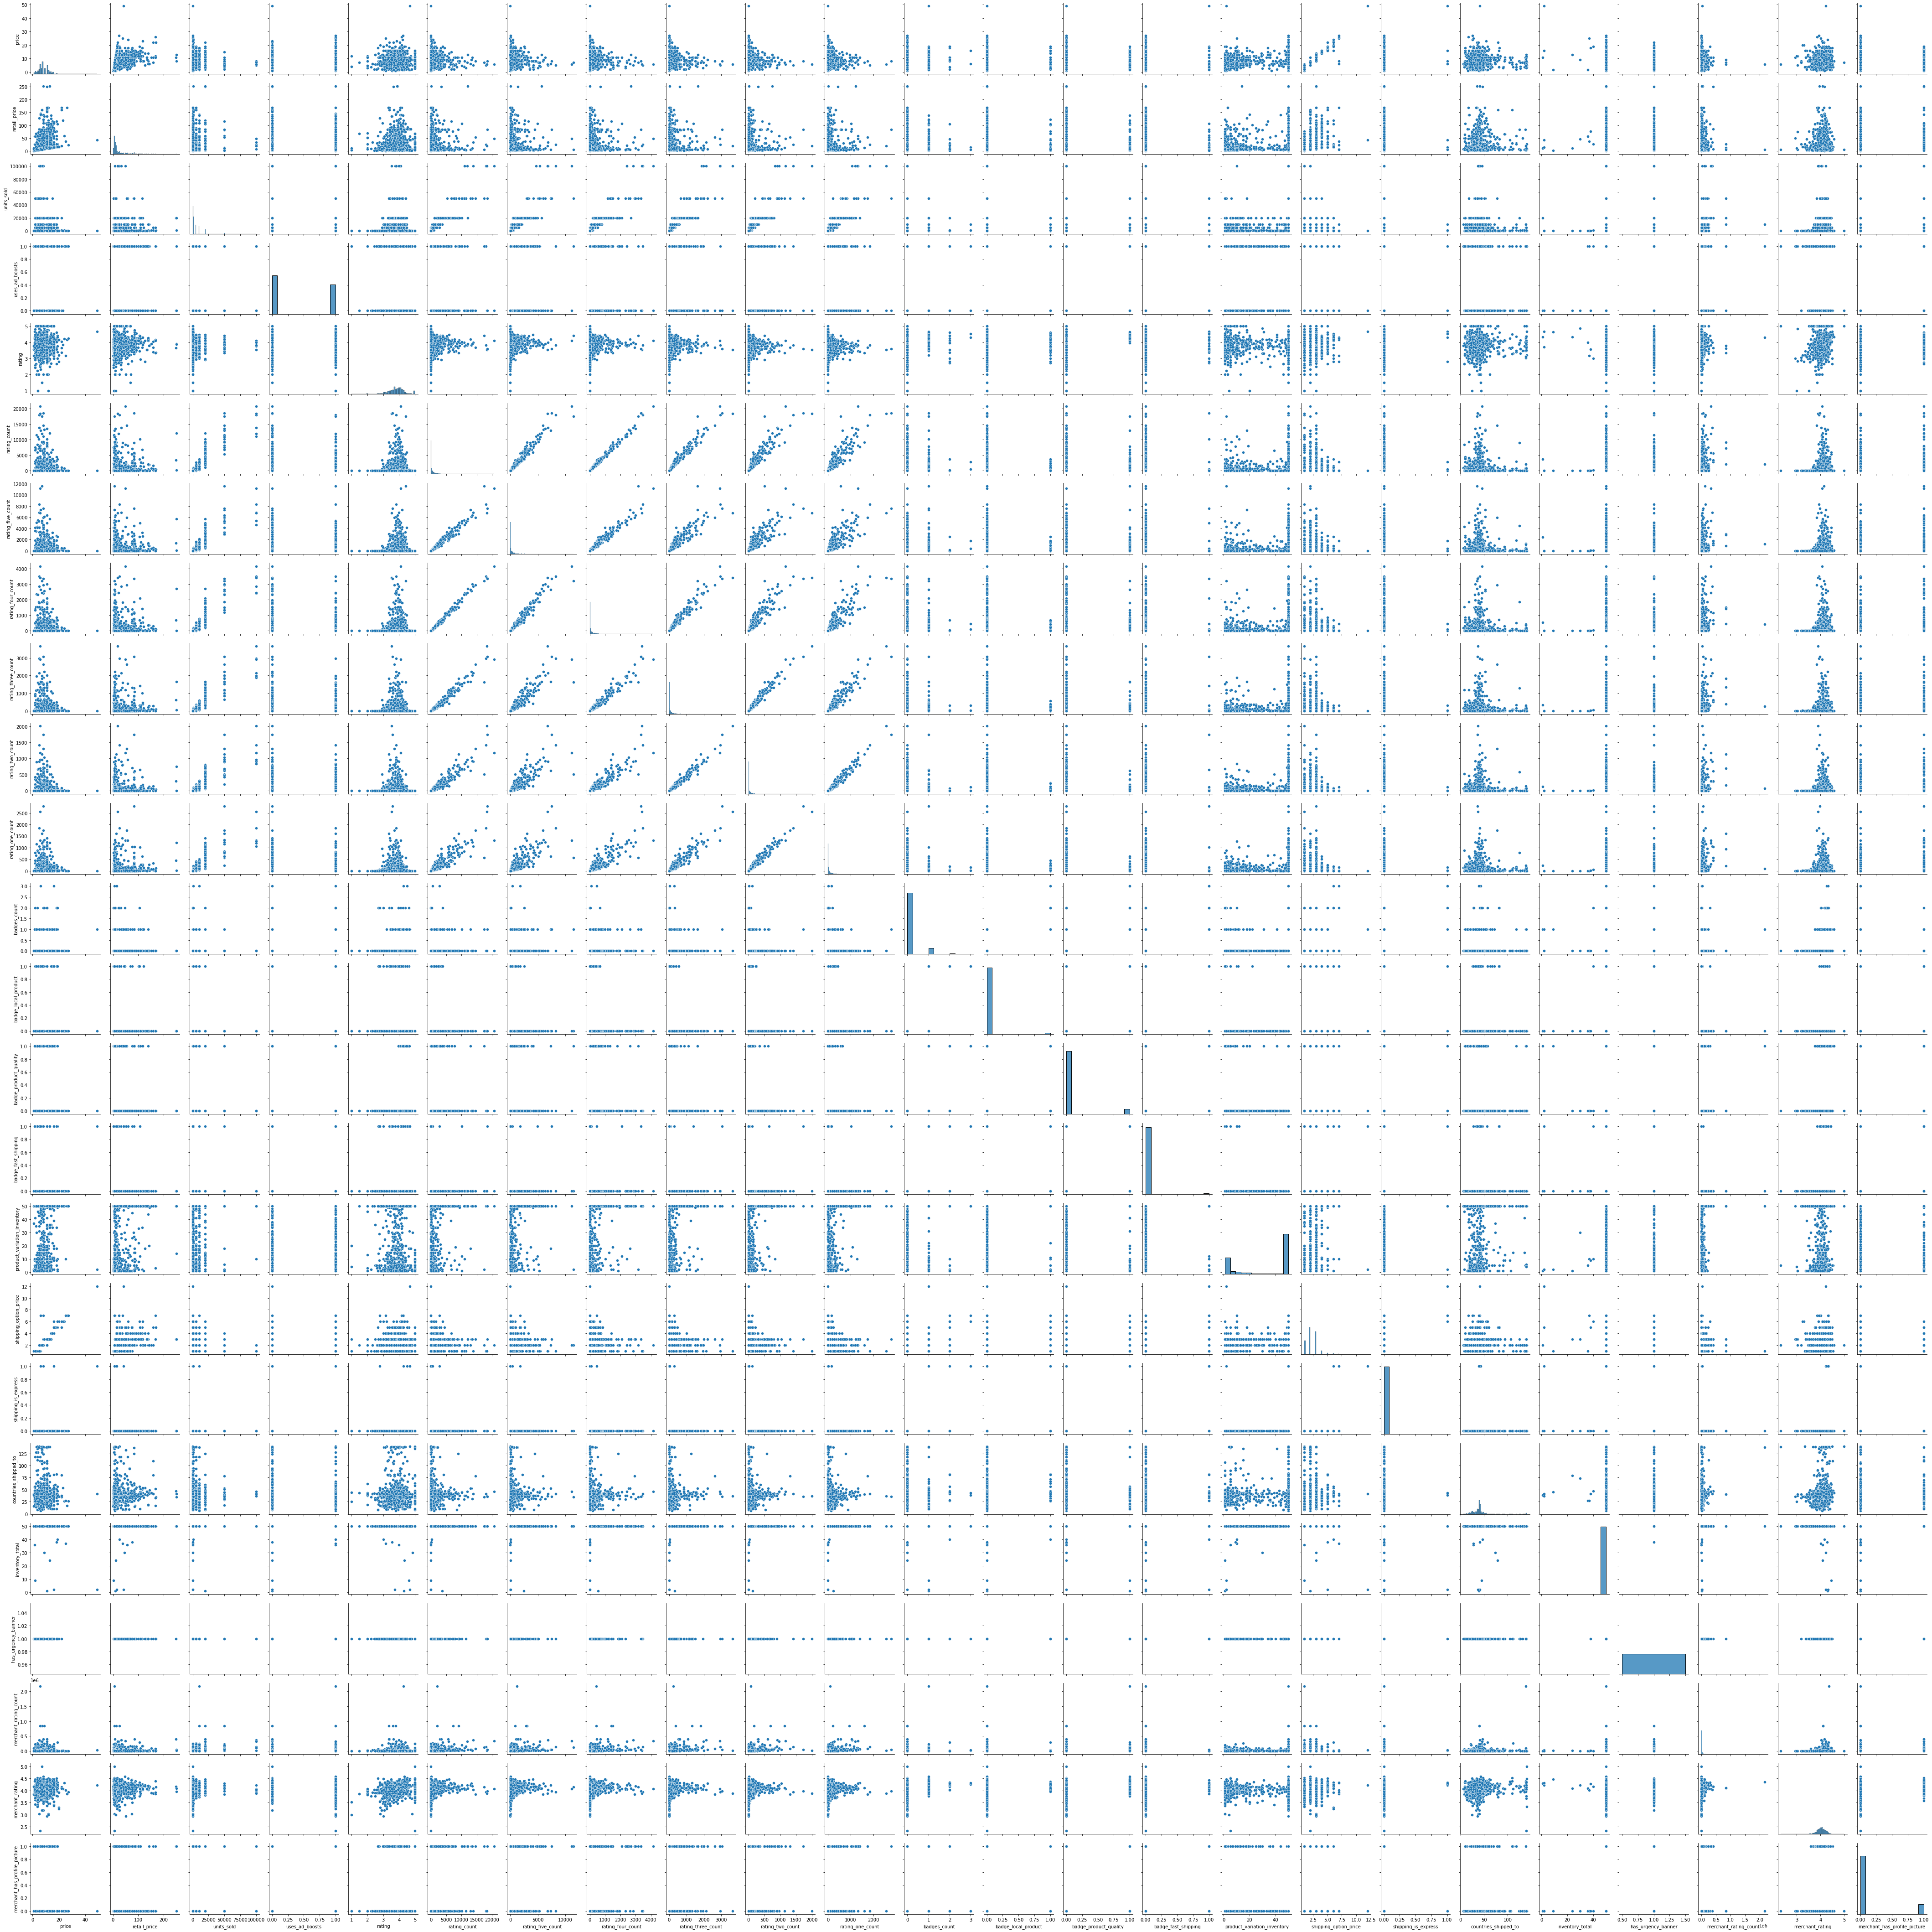

In [13]:
sns.pairplot(df_num)

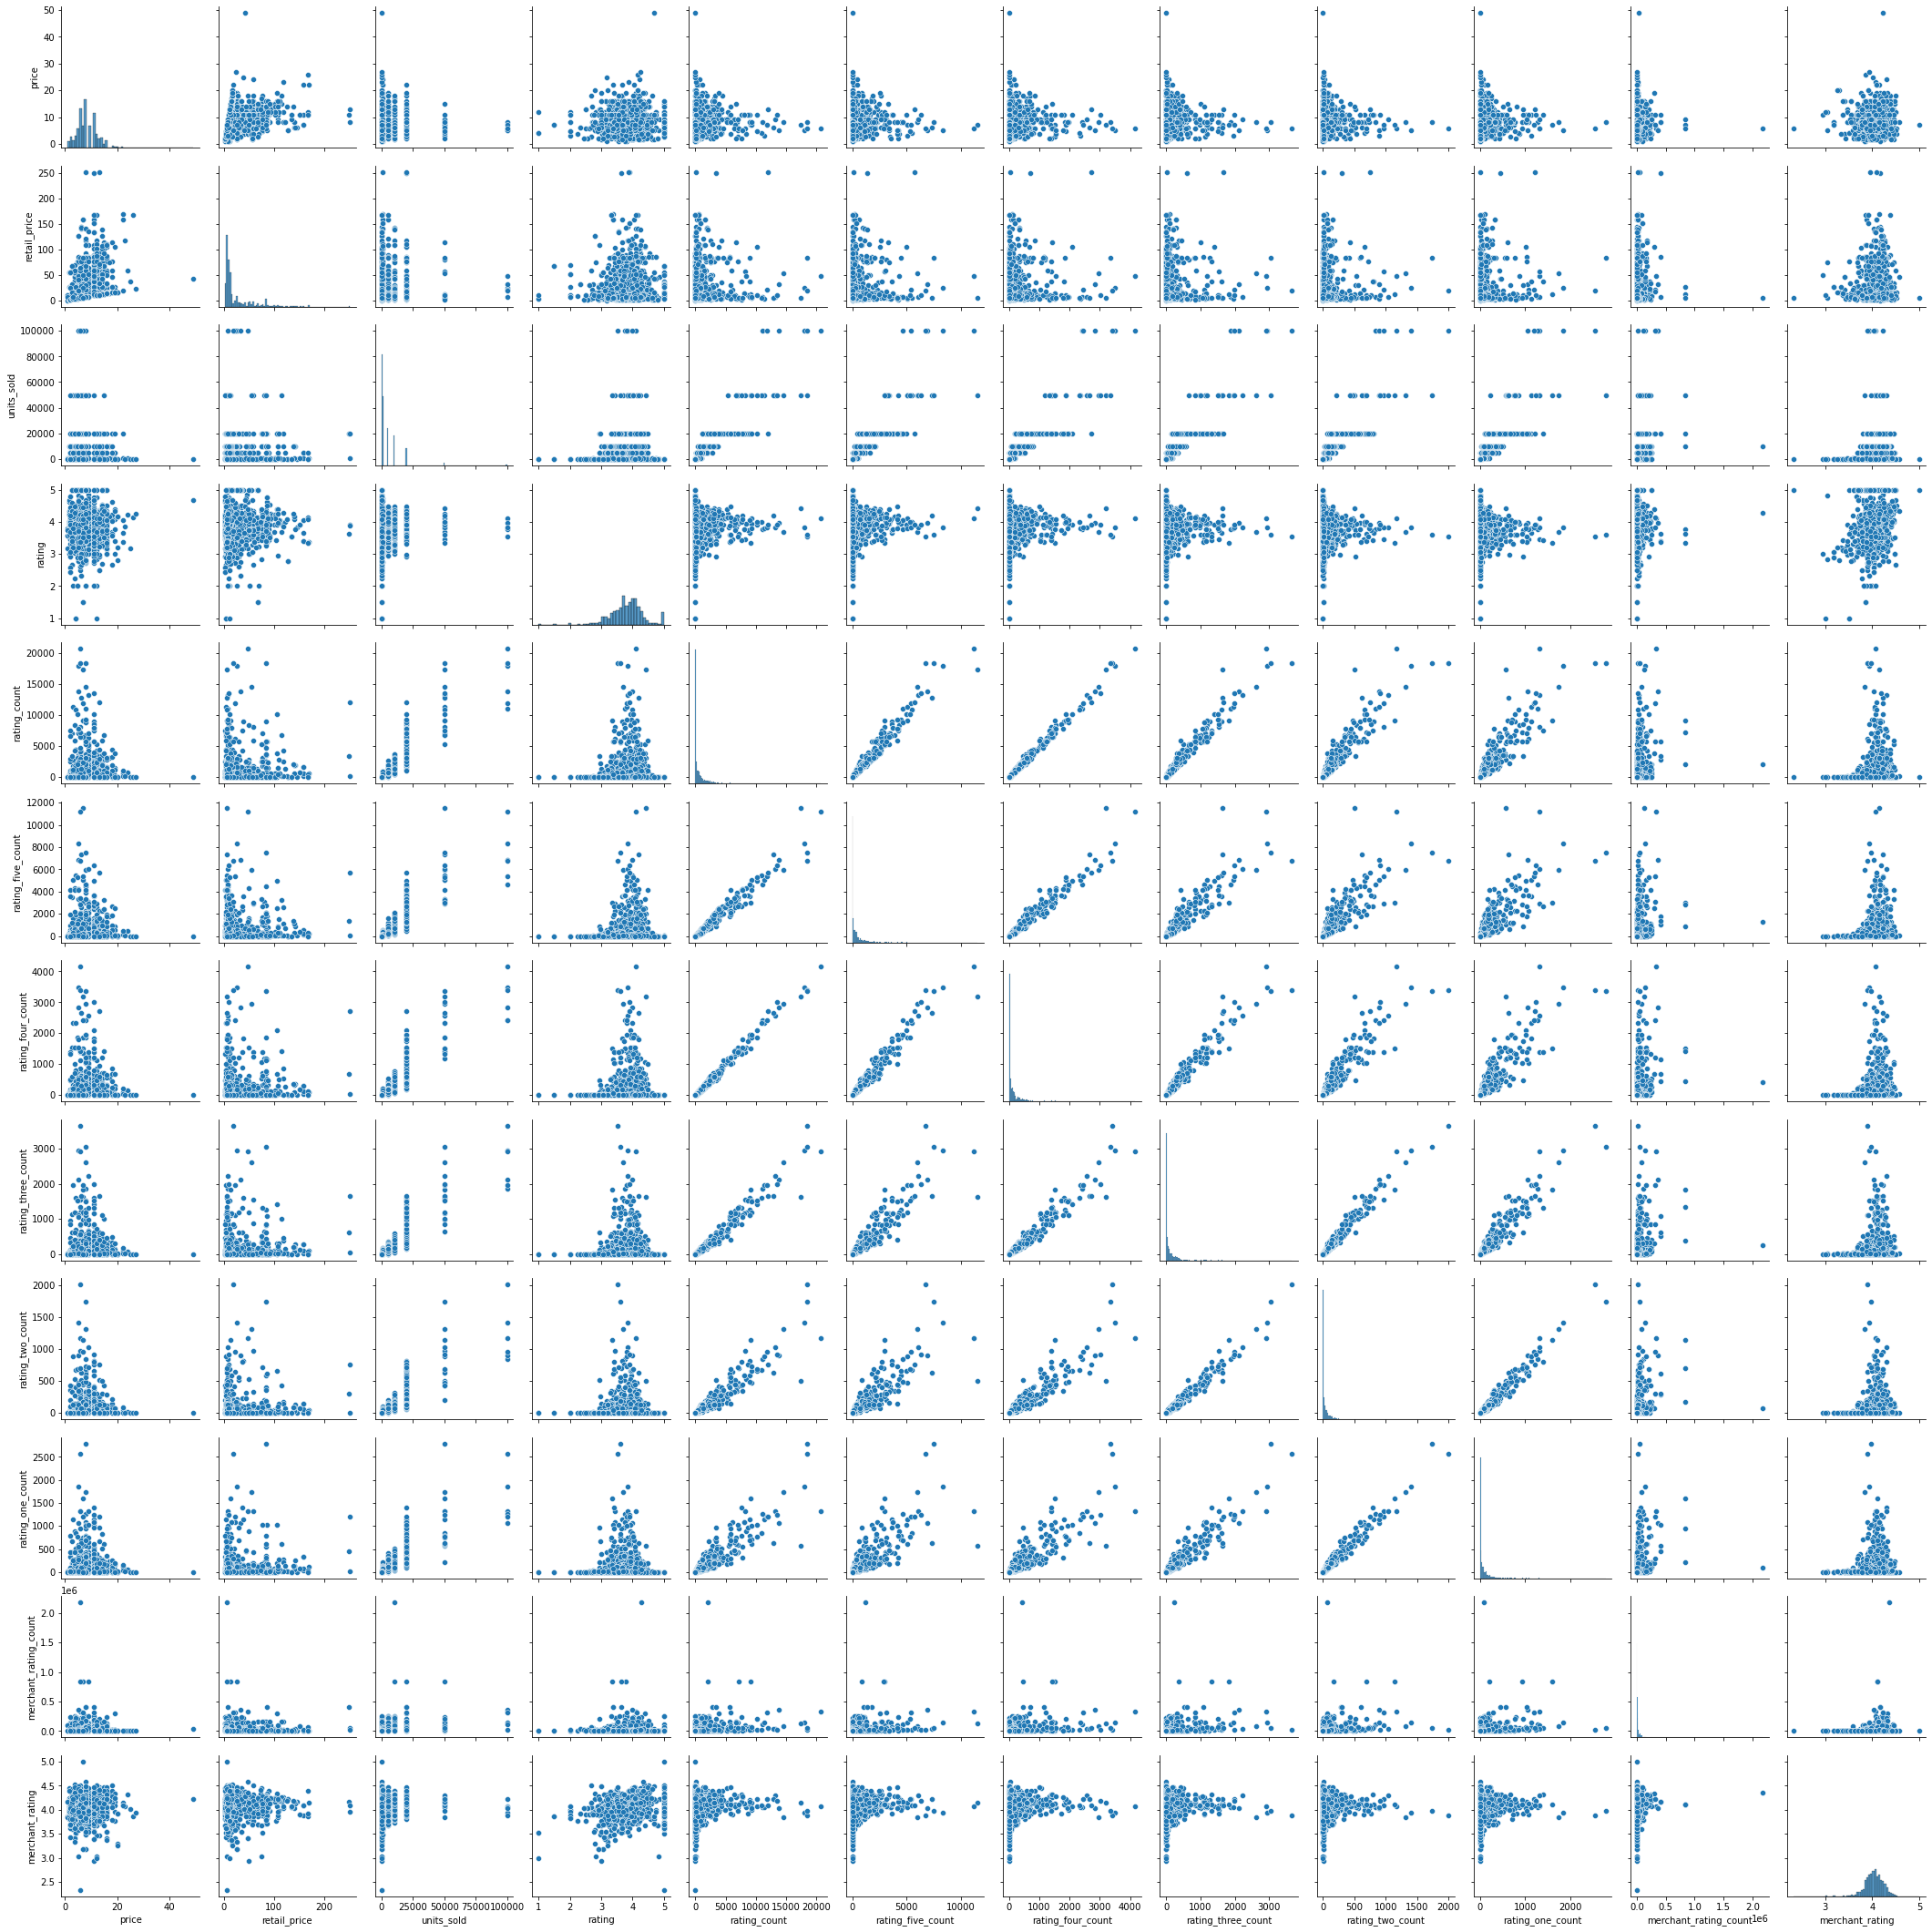

In [16]:
df_preselected_num = df[
    [
        'title',
        'title_orig',
        'price',
        'retail_price',
        'units_sold',
        'rating',
        'rating_count',
        'rating_five_count',
        'rating_four_count',
        'rating_three_count',
        'rating_two_count',
        'rating_one_count',
        'tags',
        'product_color',
        'merchant_title',
        'merchant_name',
        'merchant_rating_count',
        'merchant_rating',
        'product_picture',
    ]
].select_dtypes(include=['int64','float64'])
sns.pairplot(df_preselected_num)

# SPECIFIC COLUMNS

### `title` vs `title_orig`

In [185]:
df[['title','title_orig','tags']][:500]

title  \
0    2020 Summer Vintage Flamingo Print  Pajamas Se...   
1    SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2    2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3    Hot Summer Cool T-shirt pour les femmes Mode T...   
4    Femmes Shorts d'été à lacets taille élastique ...   
5    Plus la taille d'été femmes décontracté sans m...   
6    Women Fashion Loose Lace Blouse Blouse V Neck ...   
7    Robe tunique ample femme Robe d'été Robe en je...   
8    Robe d'été décontractée à manches courtes pour...   
9    Femmes d'été, plus la taille décontractée lâch...   
10   Femmes Mode Été Lâche Sans Manches Poches Coul...   
11   Été Sexy Femmes Mode Casual Lâche Tops Casual ...   
12   Shorts de causalité d'été de nouvelles femmes ...   
13   Mode féminine sans manches col profond croix s...   
14   2019 Summer Women's Fashion Nouvelle robe sans...   
15   Mode d'été Flare Sleeve Plus Size T-shirt hors...   
16   Nouvelle mode d'été pour femmes Robe sans manc...   
17   2018 New Fashion Women's Tops Sexy Strappy Sle...   
18   Débardeur d'été 5 Couleurs Grandes Tailles été...   
19   S ~ 5XL Zipper Vest Tee Nouveau Col En V Sans ...   
20   Top Maillot de bain Ensembles Mode Maillots de...   
21   Gilet d'été pour femmes Gilet de mode couleur ...   
22   Conception de rosée Femmes Mode D'été Sexy Col...   
23   Mode d'été Femmes À Manches Courtes U-cou Slim...   
24   Nouvelle mode pour dames Débardeurs d'été Tops...   
25   2018 Mode d'été Femme Camouflage décontracté C...   
26   Nouveau Femme Dentelle Crochet Bikini Maillot ...   
27    Printemps/Été Mode Femme "miel" Lettre Imprim...   
28   2020 nouvelle mode d'été femmes sans manches n...   
29   4 Couleur Femmes Mode Casual Couleur Unie Tops...   
30   HODMEXI Mode Amour Graffiti Imprimer Robe D'ét...   
31   Sweet Beading Cami Débardeurs pour femmes Spag...   
32   Femmes d'été Sling Robes Casual Backless Dress...   
33   T-shirts de couleur unie Bandeau Yoga Gilet Ho...   
34   Femmes Mode Gilet Plus La Taille Lâche Casual ...   
35   Imprimé floral épaule froide à volants été man...   
36   Mode d'été femme papillon réservoir gilet sans...   
37   New Women Ladies Fashion Summer Skinny High Wa...   
38   Sweat-shirt à manches longues en coton à col r...   
39   5 Couleur Femmes De Mode D'été Mince Sans Manc...   
40   Sexy Women Casual T-shirt rayé Long Tops Chemi...   
41   Mode féminine été bretelles spaghetti imprimé ...   
42   NOUVEAU Red Bull Summer Mens Casual Shorts Pan...   
43   Été Nouvelles Femmes Mode Let It ~ Abeille Imp...   
44   Nouveau Mode Femmes Dames Crochet Kimono Tops ...   
45   Women Spring and Summer Fashion Soild Color Ve...   
46   Costume de sport cool pour hommes d'été Vêteme...   
47   Fashion Femmes Combinaisons Salopette Bohemia ...   
48   Robe d'été imprimée à fleurs à manches longues...   
49   Summer Fashion New Women Letter Funny O-neck T...   
50   Femmes Mode D'été Col En V Camisole Gilet Coul...   
51   Mode féminine Maillots de bain Deux pièces Spl...   
52   Womens Fashion 3D Skull Print Cut Out Back Tan...   
53   Femmes lâche décontracté imprimé col en V robe...   
54   NOUVEAU Femmes D'été Floral Sans Manches Brete...   
55   Femmes Sexy dentelle Patchwork col en V Col en...   
56   Nouvelle mode d'été femmes robe décontractée c...   
57   Sexy Solid Solid Ruffled Chiffon Sling Top Pur...   
58   Femmes d'été Sling Dress V-cou Floral Strap pl...   
59   Zanzea S-5XL Été Femmes Col Ras Du Cou Sans Ma...   
60   Femmes D'été Nouvelle Mode Shorts De Sport Cou...   
61   Pantalon de couleur unie à la mode pour femmes...   
62   Femmes Shorts d'été à lacets taille élastique ...   
63   Robe en coton à manches courtes pour femmes d'...   
64   2018 New Fashion Women Casual Playsuit Dames J...   
65   Femmes été tricolore couture manches courtes r...   
66   Plus la taille 4XL 5XL chinois vêtements chemi...   
67   Nouvelle mode d'été femmes robe décontractée c...   
68   Femmes Mode Lâche Casual Soild Couleur Cam

### `price` vs `retail_price`

<AxesSubplot:xlabel='price', ylabel='retail_price'>

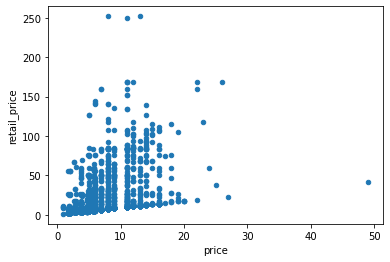

In [8]:
df.plot(kind='scatter',x='price',y='retail_price')

In [40]:
df['price']-df['price'].mean()

0       7.674628
1      -0.325372
2      -0.325372
3      -0.325372
4      -5.605372
          ...   
1568   -2.325372
1569   -6.325372
1570   -3.325372
1571    4.674628
1572   -1.325372
Name: price, Length: 1573, dtype: float64

In [47]:
df['price']

0       16.00
1        8.00
2        8.00
3        8.00
4        2.72
        ...  
1568     6.00
1569     2.00
1570     5.00
1571    13.00
1572     7.00
Name: price, Length: 1573, dtype: float64

In [9]:
understand_price = df[['price','retail_price']].copy()
understand_price['diff']=df['retail_price'] - df['price']
understand_price

price  retail_price   diff
0     16.00            14  -2.00
1      8.00            22  14.00
2      8.00            43  35.00
3      8.00             8   0.00
4      2.72             3   0.28
...     ...           ...    ...
1568   6.00             9   3.00
1569   2.00            56  54.00
1570   5.00            19  14.00
1571  13.00            11  -2.00
1572   7.00             6  -1.00

[1573 rows x 3 columns]

In [12]:
(understand_price['diff']<0).value_counts() # it can be negative

False    1014
True      559
Name: diff, dtype: int64

### `ratings`
- `rating_count` = sum of `rating_[one|two|three|four|five]_count`
- `ratings` = wavg of `rating_[one|two|three|four|five]_count`

In [16]:
[x for x in df if x.startswith('rating')]

['rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count']

In [17]:
df[[x for x in df if x.startswith('rating')]]

rating  rating_count  rating_five_count  rating_four_count  \
0       3.76            54               26.0                8.0   
1       3.45          6135             2269.0             1027.0   
2       3.57            14                5.0                4.0   
3       4.03           579              295.0              119.0   
4       3.10            20                6.0                4.0   
...      ...           ...                ...                ...   
1568    4.08          1367              722.0              293.0   
1569    3.07            28               11.0                3.0   
1570    3.71            59               24.0               15.0   
1571    2.50             2                0.0                1.0   
1572    4.07            14                8.0                3.0   

      rating_three_count  rating_two_count  rating_one_count  
0                   10.0               1.0               9.0  
1                 1118.0             644.0            1077.0  
2                    2.0               0.0               3.0  
3                   87.0              42.0              36.0  
4                    2.0               2.0               6.0  
...                  ...               ...               ...  
1568               185.0              77.0              90.0  
1569                 1.0               3.0              10.0  
1570                 8.0               3.0               9.0  
1571                 0.0               0.0               1.0  
1572                 1.0               0.0               2.0  

[1573 rows x 7 columns]

In [25]:
(
    df['rating_count'] - df[[x for x in df if (x.startswith('rating')) and (x.endswith('count'))]].drop('rating_count',axis=1).sum(axis=1)
).value_counts()

0.0    1573
dtype: int64

In [36]:
df[[x for x in df if (x.startswith('rating')) and (x.endswith('count'))]].drop('rating_count',axis=1)

rating_five_count  rating_four_count  rating_three_count  \
0                  26.0                8.0                10.0   
1                2269.0             1027.0              1118.0   
2                   5.0                4.0                 2.0   
3                 295.0              119.0                87.0   
4                   6.0                4.0                 2.0   
...                 ...                ...                 ...   
1568              722.0              293.0               185.0   
1569               11.0                3.0                 1.0   
1570               24.0               15.0                 8.0   
1571                0.0                1.0                 0.0   
1572                8.0                3.0                 1.0   

      rating_two_count  rating_one_count  
0                  1.0               9.0  
1                644.0            1077.0  
2                  0.0               3.0  
3                 42.0              36.0  
4                  2.0               6.0  
...                ...               ...  
1568              77.0              90.0  
1569               3.0              10.0  
1570               3.0               9.0  
1571               0.0               1.0  
1572               0.0               2.0  

[1573 rows x 5 columns]

In [47]:
pd.DataFrame(
    {
        'wavg' : (
            df['rating_five_count']*5+
            df['rating_four_count']*4+
            df['rating_three_count']*3+
            df['rating_two_count']*2+
            df['rating_one_count']*1
        ) / df[[x for x in df if (x.startswith('rating')) and (x.endswith('count'))]].drop('rating_count',axis=1).sum(axis=1),
        'rating' : df['rating'],
    }
)

wavg  rating
0     3.759259    3.76
1     3.451019    3.45
2     3.571429    3.57
3     4.027634    4.03
4     3.100000    3.10
...        ...     ...
1568  4.082663    4.08
1569  3.071429    3.07
1570  3.711864    3.71
1571  2.500000    2.50
1572  4.071429    4.07

[1573 rows x 2 columns]

<AxesSubplot:>

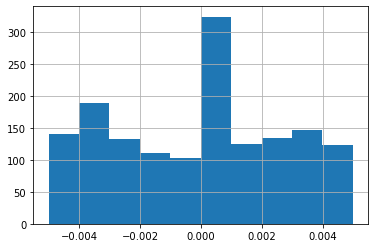

In [51]:
(
    (
        df['rating_five_count']*5+
        df['rating_four_count']*4+
        df['rating_three_count']*3+
        df['rating_two_count']*2+
        df['rating_one_count']*1
    ) / df[[x for x in df if (x.startswith('rating')) and (x.endswith('count'))]].drop('rating_count',axis=1).sum(axis=1) - \
    df['rating']
).hist()

### badges
- `badges_count` = sum `badge_*`
- `badge_*` data is very sparse

In [114]:
[x for x in df if x.startswith('badge')]

['badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping']

In [119]:
(
    df['badges_count'] - df[[x for x in df if x.startswith('badge_')]].sum(axis=1)
).value_counts()

0    1573
dtype: int64

In [120]:
df[[x for x in df if x.startswith('badge_')]].sum()

badge_local_product       29
badge_product_quality    117
badge_fast_shipping       20
dtype: int64

### product
- `product_url` is dead
- `product_id` is uid for product, can actually be found in link actuall
- `product_picture` still works!

In [136]:
(
    df['product_url'] == df['product_id'].apply(lambda x:'https://www.wish.com/c/'+x)
).value_counts()

True    1573
dtype: int64

### scrape meta data

In [138]:
df['theme'].value_counts() # not useful

summer    1573
Name: theme, dtype: int64

In [126]:
df['crawl_month'].value_counts() # not useful

2020-08    1573
Name: crawl_month, dtype: int64

### tags
- dont bother splitting, just find strings directly in tags
- prob want to join `title`, `title_orig` and `tags` together to do a text search on

##### extract all tags across all entries

In [112]:
df[['title','title_orig','tags']][:500]

title  \
0    2020 Summer Vintage Flamingo Print  Pajamas Se...   
1    SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2    2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3    Hot Summer Cool T-shirt pour les femmes Mode T...   
4    Femmes Shorts d'été à lacets taille élastique ...   
5    Plus la taille d'été femmes décontracté sans m...   
6    Women Fashion Loose Lace Blouse Blouse V Neck ...   
7    Robe tunique ample femme Robe d'été Robe en je...   
8    Robe d'été décontractée à manches courtes pour...   
9    Femmes d'été, plus la taille décontractée lâch...   
10   Femmes Mode Été Lâche Sans Manches Poches Coul...   
11   Été Sexy Femmes Mode Casual Lâche Tops Casual ...   
12   Shorts de causalité d'été de nouvelles femmes ...   
13   Mode féminine sans manches col profond croix s...   
14   2019 Summer Women's Fashion Nouvelle robe sans...   
15   Mode d'été Flare Sleeve Plus Size T-shirt hors...   
16   Nouvelle mode d'été pour femmes Robe sans manc...   
17   2018 New Fashion Women's Tops Sexy Strappy Sle...   
18   Débardeur d'été 5 Couleurs Grandes Tailles été...   
19   S ~ 5XL Zipper Vest Tee Nouveau Col En V Sans ...   
20   Top Maillot de bain Ensembles Mode Maillots de...   
21   Gilet d'été pour femmes Gilet de mode couleur ...   
22   Conception de rosée Femmes Mode D'été Sexy Col...   
23   Mode d'été Femmes À Manches Courtes U-cou Slim...   
24   Nouvelle mode pour dames Débardeurs d'été Tops...   
25   2018 Mode d'été Femme Camouflage décontracté C...   
26   Nouveau Femme Dentelle Crochet Bikini Maillot ...   
27    Printemps/Été Mode Femme "miel" Lettre Imprim...   
28   2020 nouvelle mode d'été femmes sans manches n...   
29   4 Couleur Femmes Mode Casual Couleur Unie Tops...   
30   HODMEXI Mode Amour Graffiti Imprimer Robe D'ét...   
31   Sweet Beading Cami Débardeurs pour femmes Spag...   
32   Femmes d'été Sling Robes Casual Backless Dress...   
33   T-shirts de couleur unie Bandeau Yoga Gilet Ho...   
34   Femmes Mode Gilet Plus La Taille Lâche Casual ...   
35   Imprimé floral épaule froide à volants été man...   
36   Mode d'été femme papillon réservoir gilet sans...   
37   New Women Ladies Fashion Summer Skinny High Wa...   
38   Sweat-shirt à manches longues en coton à col r...   
39   5 Couleur Femmes De Mode D'été Mince Sans Manc...   
40   Sexy Women Casual T-shirt rayé Long Tops Chemi...   
41   Mode féminine été bretelles spaghetti imprimé ...   
42   NOUVEAU Red Bull Summer Mens Casual Shorts Pan...   
43   Été Nouvelles Femmes Mode Let It ~ Abeille Imp...   
44   Nouveau Mode Femmes Dames Crochet Kimono Tops ...   
45   Women Spring and Summer Fashion Soild Color Ve...   
46   Costume de sport cool pour hommes d'été Vêteme...   
47   Fashion Femmes Combinaisons Salopette Bohemia ...   
48   Robe d'été imprimée à fleurs à manches longues...   
49   Summer Fashion New Women Letter Funny O-neck T...   
50   Femmes Mode D'été Col En V Camisole Gilet Coul...   
51   Mode féminine Maillots de bain Deux pièces Spl...   
52   Womens Fashion 3D Skull Print Cut Out Back Tan...   
53   Femmes lâche décontracté imprimé col en V robe...   
54   NOUVEAU Femmes D'été Floral Sans Manches Brete...   
55   Femmes Sexy dentelle Patchwork col en V Col en...   
56   Nouvelle mode d'été femmes robe décontractée c...   
57   Sexy Solid Solid Ruffled Chiffon Sling Top Pur...   
58   Femmes d'été Sling Dress V-cou Floral Strap pl...   
59   Zanzea S-5XL Été Femmes Col Ras Du Cou Sans Ma...   
60   Femmes D'été Nouvelle Mode Shorts De Sport Cou...   
61   Pantalon de couleur unie à la mode pour femmes...   
62   Femmes Shorts d'été à lacets taille élastique ...   
63   Robe en coton à manches courtes pour femmes d'...   
64   2018 New Fashion Women Casual Playsuit Dames J...   
65   Femmes été tricolore couture manches courtes r...   
66   Plus la taille 4XL 5XL chinois vêtements chemi...   
67   Nouvelle mode d'été femmes robe décontractée c...   
68   Femmes Mode Lâche Casual Soild Couleur Cam

In [109]:
import re

def set_ify_tags(t):
    l = re.split(',| ',t) # split on comma and space 
    l = [x.replace('\'','') for x in l] # remove apostrophes
    l = [x.replace('#','') for x in l] # remove apostrophes
    l = [x.lower() for x in l] # make all lower
    return set(l)

In [110]:
# as a set
all_tags_set = set.union(*list(df['tags'].apply(set_ify_tags).values))

# as a sorted list
all_tags_list = list(all_tags_set)
all_tags_list = sorted(all_tags_list)

print(f'len = {len(all_tags_list)}')
display(all_tags_list)

len = 2106


['',
 '&',
 '2',
 '2014menshort',
 '2014summermenshort',
 '2018fashion',
 '2in1short',
 '2in1sportsjogging',
 '2piecebathingsuit',
 '2piecesbikini',
 '2pieceset',
 '34pant',
 '34sleeve',
 '34sleevedres',
 '3d',
 '3dprint',
 '3dprintedtshirt',
 '3dprinttshirt',
 '3mreflective',
 '5pointspant',
 '90sfashion',
 'a',
 'a-line',
 'abito',
 'above',
 'accessories',
 'accessory',
 'active',
 'adidas',
 'adjustable',
 'air',
 'airball',
 'american',
 'and',
 'angel',
 'angelprint',
 'animal',
 'animalprotectiontshirt',
 'ankle',
 'ankleinvisiblesock',
 'anklesock',
 'ankletchain',
 'anklets',
 'anticellulite',
 'antifoggoggle',
 'antimosquitofly',
 'antimosquitonet',
 'antislip',
 'antislipsock',
 'armpit',
 'armpitguard',
 'armpitsweatpad',
 'arms',
 'army',
 'arrival',
 'art',
 'asymmetric',
 'asymmetrical',
 'asymmetricalhem',
 'asymmetricdres',
 'athleticpant',
 'athletics',
 'athleticset',
 'athleticshort',
 'athleticshortsmen',
 'autumn',
 'autumnblouse',
 'avocado',
 'awordcollar',
 'ba

# PRESELECTED COLUMNS
- selected / unselected columns based off Google Sheet summary

In [179]:
preselected_columns = [
    'title',
    'title_orig',
    'price',
    'retail_price',
    'units_sold',
    'rating',
    'rating_count',
    'rating_five_count',
    'rating_four_count',
    'rating_three_count',
    'rating_two_count',
    'rating_one_count',
    'tags',
    'product_color',
    'merchant_title',
    'merchant_name',
    'merchant_rating_count',
    'merchant_rating',
    'product_picture',
 ]

### selected columns dataset

In [181]:
df.loc[:,preselected_columns]

title  \
0     2020 Summer Vintage Flamingo Print  Pajamas Se...   
1     SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2     2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3     Hot Summer Cool T-shirt pour les femmes Mode T...   
4     Femmes Shorts d'été à lacets taille élastique ...   
...                                                 ...   
1568  Nouvelle Mode Femmes Bohême Pissenlit Imprimer...   
1569  10 couleurs femmes shorts d'été lacent ceintur...   
1570  Nouveautés Hommes Siwmwear Beach-Shorts Hommes...   
1571  Mode femmes d'été sans manches robes col en V ...   
1572  Pantalon de yoga pour femmes à la mode Slim Fi...   

                                             title_orig  price  retail_price  \
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1      Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2     2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3     Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4     Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   
...                                                 ...    ...           ...   
1568  New Fashion Women Bohemia Dandelion Print Tee ...   6.00             9   
1569  10 Color Women Summer Shorts Lace Up Elastic W...   2.00            56   
1570  New Men Siwmwear Beach-Shorts Men Summer Quick...   5.00            19   
1571  Fashion Women Summer Sleeveless Dresses V Neck...  13.00            11   
1572  Fashion Women Yoga Pants Slim Fit Fitness Runn...   7.00             6   

      units_sold  rating  rating_count  rating_five_count  rating_four_count  \
0            100    3.76            54               26.0                8.0   
1          20000    3.45          6135             2269.0             1027.0   
2            100    3.57            14                5.0                4.0   
3           5000    4.03           579              295.0              119.0   
4            100    3.10            20                6.0                4.0   
...          ...     ...           ...                ...                ...   
1568       10000    4.08          1367              722.0              293.0   
1569         100    3.07            28               11.0                3.0   
1570         100    3.71            59               24.0               15.0   
1571         100    2.50             2                0.0                1.0   
1572         100    4.07            14                8.0                3.0   

      rating_three_count  rating_two_count  rating_one_count  \
0                   10.0               1.0               9.0   
1                 1118.0             644.0            1077.0   
2                    2.0               0.0               3.0   
3                   87.0              42.0              36.0   
4                    2.0               2.0               6.0   
...                  ...               ...               ...   
1568               185.0              77.0              90.0   
1569                 1.0               3.0              10.0   
1570                 8.0               3.0               9.0   
1571                 0.0               0.0               1.0   
1572                 1.0               0.0               2.0   

                                                   tags product_color  \
0     Summer,Fashion,womenunderwearsuit,printedpajam...         white   
1     Mini,womens dresses,Summer,Patchwork,fashion d...         green   
2     Summer,cardigan,women beachwear,chiffon,Sexy w...  leopardprint   
3     Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...         black   
4     Summer,Plus Size,Lace,Casual pants,Bottom,pant...        yellow   
...                                                 ...           ...   
1568  bohemia,Plus Size,dandelionfloralprinted,short...      navyblue   
1569  Summer,Panties,Elastic,Lace,Casual pants,casua...     lightb

### unselected columns dataset

In [186]:
[x for x in df.columns if x not in preselected_columns]

['currency_buyer',
 'uses_ad_boosts',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_size_id',
 'product_variation_inventory',
 'shipping_option_name',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'urgency_text',
 'origin_country',
 'merchant_info_subtitle',
 'merchant_id',
 'merchant_has_profile_picture',
 'merchant_profile_picture',
 'product_url',
 'product_id',
 'theme',
 'crawl_month']

In [180]:
df.loc[:,[x for x in df.columns if x not in preselected_columns]]

currency_buyer  uses_ad_boosts  badges_count  badge_local_product  \
0               EUR               0             0                    0   
1               EUR               1             0                    0   
2               EUR               0             0                    0   
3               EUR               1             0                    0   
4               EUR               1             0                    0   
...             ...             ...           ...                  ...   
1568            EUR               1             0                    0   
1569            EUR               1             0                    0   
1570            EUR               0             0                    0   
1571            EUR               0             0                    0   
1572            EUR               1             0                    0   

      badge_product_quality  badge_fast_shipping product_variation_size_id  \
0                         0                    0                         M   
1                         0                    0                        XS   
2                         0                    0                        XS   
3                         0                    0                         M   
4                         0                    0                         S   
...                     ...                  ...                       ...   
1568                      0                    0                         S   
1569                      0                    0                         S   
1570                      0                    0                    SIZE S   
1571                      0                    0                   Size S.   
1572                      0                    0                         S   

      product_variation_inventory shipping_option_name  shipping_option_price  \
0                              50   Livraison standard                      4   
1                              50   Livraison standard                      2   
2                               1   Livraison standard                      3   
3                              50   Livraison standard                      2   
4                               1   Livraison standard                      1   
...                           ...                  ...                    ...   
1568                           50   Livraison standard                      2   
1569                            2   Livraison standard                      1   
1570                           15   Livraison standard                      2   
1571                           36   Livraison standard                      3   
1572                           50   Livraison standard                      2   

      ...        urgency_text  origin_country  \
0     ...  Quantité limitée !              CN   
1     ...  Quantité limitée !              CN   
2     ...  Quantité limitée !              CN   
3     ...                 NaN              CN   
4     ...  Quantité limitée !              CN   
...   ...                 ...             ...   
1568  ...                 NaN              CN   
1569  ...  Quantité limitée !              CN   
1570  ...                 NaN              CN   
1571  ...                 NaN              CN   
1572  ...                 NaN              CN   

                 merchant_info_subtitle               merchant_id  \
0                           (568 notes)  595097d6a26f6e070cb878d1   
1     83 % avis positifs (17,752 notes)  56458aa03a698c35c9050988   
2        86 % avis positifs (295 notes)  5d464a1ffdf7bc44ee933c65   
3                        (23,832 notes)  58cfdefdacb37b556efdff7c   
4     85 % avis positifs (14,482 notes)  5ab3b592c3911a095ad5dadb   
...                                 ...                       ...   
1568   90 % avis positifs (5,316 notes)  5b507899ab577736508a0782   
1569                      (4,435 notes)  54d83b6b6b8a771e478558de

# DUPLICATE PRODUCTS

In [ ]:
df.groupby('product_picture').apply(lambda x:x.index)

In [25]:
df.drop_duplicates()

title  \
0     2020 Summer Vintage Flamingo Print  Pajamas Se...   
1     SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2     2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3     Hot Summer Cool T-shirt pour les femmes Mode T...   
4     Femmes Shorts d'été à lacets taille élastique ...   
...                                                 ...   
1568  Nouvelle Mode Femmes Bohême Pissenlit Imprimer...   
1569  10 couleurs femmes shorts d'été lacent ceintur...   
1570  Nouveautés Hommes Siwmwear Beach-Shorts Hommes...   
1571  Mode femmes d'été sans manches robes col en V ...   
1572  Pantalon de yoga pour femmes à la mode Slim Fi...   

                                             title_orig  price  retail_price  \
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1      Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2     2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3     Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4     Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   
...                                                 ...    ...           ...   
1568  New Fashion Women Bohemia Dandelion Print Tee ...   6.00             9   
1569  10 Color Women Summer Shorts Lace Up Elastic W...   2.00            56   
1570  New Men Siwmwear Beach-Shorts Men Summer Quick...   5.00            19   
1571  Fashion Women Summer Sleeveless Dresses V Neck...  13.00            11   
1572  Fashion Women Yoga Pants Slim Fit Fitness Runn...   7.00             6   

     currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0               EUR         100               0    3.76            54   
1               EUR       20000               1    3.45          6135   
2               EUR         100               0    3.57            14   
3               EUR        5000               1    4.03           579   
4               EUR         100               1    3.10            20   
...             ...         ...             ...     ...           ...   
1568            EUR       10000               1    4.08          1367   
1569            EUR         100               1    3.07            28   
1570            EUR         100               0    3.71            59   
1571            EUR         100               0    2.50             2   
1572            EUR         100               1    4.07            14   

      rating_five_count  ...  merchant_rating_count  merchant_rating  \
0                  26.0  ...                    568         4.128521   
1                2269.0  ...                  17752         3.899673   
2                   5.0  ...                    295         3.989831   
3                 295.0  ...                  23832         4.020435   
4                   6.0  ...                  14482         4.001588   
...                 ...  ...                    ...              ...   
1568              722.0  ...                   5316         4.224605   
1569               11.0  ...                   4435         3.696054   
1570               24.0  ...                    210         3.961905   
1571                0.0  ...                     31         3.774194   
1572                8.0  ...                   7023         4.235939   

                   merchant_id  merchant_has_profile_picture  \
0     595097d6a26f6e070cb878d1                             0   
1     56458aa03a698c35c9050988                             0   
2     5d464a1ffdf7bc44ee933c65                             0   
3     58cfdefdacb37b556efdff7c                             0   
4     5ab3b592c3911a095ad5dadb                             0   
...                        ...                           ...   
1568  5b507899ab577736508a0782                             0   
1569  54d83b6b6b8a771e478558de                             0   
1570  5b42da1bf64320209fc8da69                             0  

In [24]:
df.loc[[555, 1148]].transpose()

555   \
title                         Femmes Robes D'été De Mode Col En V Dos Nu Rob...   
title_orig                    Women's Fashion Summer Dresses V Neck Backless...   
price                                                                      12.0   
retail_price                                                                 11   
currency_buyer                                                              EUR   
units_sold                                                                  100   
uses_ad_boosts                                                                1   
rating                                                                      5.0   
rating_count                                                                  0   
rating_five_count                                                           NaN   
rating_four_count                                                           NaN   
rating_three_count                                                          NaN   
rating_two_count                                                            NaN   
rating_one_count                                                            NaN   
badges_count                                                                  0   
badge_local_product                                                           0   
badge_product_quality                                                         0   
badge_fast_shipping                                                           0   
tags                          Summer,Plus Size,partydressesforwomen,Lace,rob...   
product_color                                                            yellow   
product_variation_size_id                                                    XS   
product_variation_inventory                                                   5   
shipping_option_name                                         Livraison standard   
shipping_option_price                                                         3   
shipping_is_express                                                           0   
countries_shipped_to                                                         25   
inventory_total                                                              50   
has_urgency_banner                                                          NaN   
urgency_text                                                                NaN   
origin_country                                                               CN   
merchant_title                                                            ASKY1   
merchant_name                                                         ahighqlty   
merchant_info_subtitle                            100 % avis positifs (6 notes)   
merchant_rating_count                                                         6   
merchant_rating                                                             4.5   
merchant_id                                            5e70afae21861a90a4e6b7f0   
merchant_has_profile_picture                                                  0   
merchant_profile_picture                                                    NaN   
product_url                     https://www.wish.com/c/5f03643cc00703c46d6745f0   
product_picture               https://contestimg.wish.com/api/webimage/5f036...   
product_id                                             5f03643cc00703c46d6745f0   
theme                                                                    summer   
crawl_month                                                             2020-08   

                                                                           1148  
title                         Femmes Robes D'été De Mode Col En V Dos Nu Rob...  
title_orig                    Women's Fashion Summer Dresses V Neck Backless...  
price                                                                      12.0  
retail_price                                                                 11  
currency_buy

In [22]:
df.groupby('product_picture').apply(lambda x:x.index)

product_picture
https://contestimg.wish.com/api/webimage/535530635aefb0555ba4351f-medium.jpg          Int64Index([244], dtype='int64')
https://contestimg.wish.com/api/webimage/53897eeeafddf70c91af1cda-medium.jpg          Int64Index([251], dtype='int64')
https://contestimg.wish.com/api/webimage/53c8f05046188e57778ac77c-medium.jpg          Int64Index([536], dtype='int64')
https://contestimg.wish.com/api/webimage/544b079d1280fa28eee9b380-medium.jpg           Int64Index([92], dtype='int64')
https://contestimg.wish.com/api/webimage/54ab85ff509baf3e966f7f2a-medium.jpg         Int64Index([1020], dtype='int64')
                                                                                                 ...                  
https://contestimg.wish.com/api/webimage/5f03643cc00703c46d6745f0-medium.jpg    Int64Index([555, 1148], dtype='int64')
https://contestimg.wish.com/api/webimage/5f046ac0980447385a1a28e4-medium.jpg         Int64Index([1430], dtype='int64')
https://contestimg.wish.com/api/

In [21]:
df['product_picture'].value_counts()[:200]

https://contestimg.wish.com/api/webimage/5ee8875404718a4bba2d6348-medium.jpg    3
https://contestimg.wish.com/api/webimage/5ea91e4d29b81241e1d43b27-medium.jpg    3
https://contestimg.wish.com/api/webimage/5e9dad8cbc19c300417e1733-medium.jpg    3
https://contestimg.wish.com/api/webimage/5dea1d9cec016f062ce8aab1-medium.jpg    3
https://contestimg.wish.com/api/webimage/5eb2200b989caa081980b812-medium.jpg    3
https://contestimg.wish.com/api/webimage/5cde56ea6bbbd86b1cbab4a8-medium.jpg    3
https://contestimg.wish.com/api/webimage/5eb4dd169263020a42be1a88-medium.jpg    3
https://contestimg.wish.com/api/webimage/5e16cb87e6dd7c03be24b28a-medium.jpg    3
https://contestimg.wish.com/api/webimage/5e9932cab3eafb25c00ba79f-medium.jpg    3
https://contestimg.wish.com/api/webimage/5e142dee04c3e579e89576a3-medium.jpg    3
https://contestimg.wish.com/api/webimage/5ebff6d34a4cf4438dba5d80-medium.jpg    3
https://contestimg.wish.com/api/webimage/5ebe0ead593b960eb1c82d0b-medium.jpg    3
https://contesti

In [19]:
df.reset_index().groupby('product_picture')

product_picture                                                                   
https://contestimg.wish.com/api/webimage/535530635aefb0555ba4351f-medium.jpg  244      244
https://contestimg.wish.com/api/webimage/53897eeeafddf70c91af1cda-medium.jpg  251      251
https://contestimg.wish.com/api/webimage/53c8f05046188e57778ac77c-medium.jpg  536      536
https://contestimg.wish.com/api/webimage/544b079d1280fa28eee9b380-medium.jpg  92        92
https://contestimg.wish.com/api/webimage/54ab85ff509baf3e966f7f2a-medium.jpg  1020    1020
https://contestimg.wish.com/api/webimage/54bdf18039b8c045f118936a-medium.jpg  214      214
https://contestimg.wish.com/api/webimage/5525ebeb3056e817e9ccba1d-medium.jpg  190      190
https://contestimg.wish.com/api/webimage/552f840fcea30816e52aabcf-medium.jpg  498      498
https://contestimg.wish.com/api/webimage/554b114fff561a1235152554-medium.jpg  492      492
https://contestimg.wish.com/api/webimage/556fbe8595528719e004fa27-medium.jpg  40        40
https:/